In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
        
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=Warning)

In [6]:
heart_df = pd.read_csv("heart_2020_cleaned.csv")
print(heart_df.shape)
heart_df.head(10).T

(319795, 18)


0            1      2       3          4       5  \
HeartDisease             No           No     No      No         No     Yes   
BMI                    16.6        20.34  26.58   24.21      23.71   28.87   
Smoking                 Yes           No    Yes      No         No     Yes   
AlcoholDrinking          No           No     No      No         No      No   
Stroke                   No          Yes     No      No         No      No   
PhysicalHealth          3.0          0.0   20.0     0.0       28.0     6.0   
MentalHealth           30.0          0.0   30.0     0.0        0.0     0.0   
DiffWalking              No           No     No      No        Yes     Yes   
Sex                  Female       Female   Male  Female     Female  Female   
AgeCategory           55-59  80 or older  65-69   75-79      40-44   75-79   
Race                  White        White  White   White      White   Black   
Diabetic                Yes           No    Yes      No         No      No   
PhysicalActivity        Yes          Yes    Yes      No        Yes      No   
GenHealth         Very good    Very good   Fair    Good  Very good    Fair   
SleepTime               5.0          7.0    8.0     6.0        8.0    12.0   
Asthma                  Yes           No    Yes      No         No      No   
KidneyDisease            No           No     No      No         No      No   
SkinCancer              Yes           No     No     Yes         No      No   

                       6            7                        8      9  
HeartDisease          No           No                       No     No  
BMI                21.63        31.64                    26.45  40.69  
Smoking               No          Yes                       No     No  
AlcoholDrinking       No           No                       No     No  
Stroke                No           No                       No     No  
PhysicalHealth      15.0          5.0                      0.0    0.0  
MentalHealth         0.0          0.0                      0.0    0.0  
DiffWalking           No          Yes                       No    Yes  
Sex               Female       Female                   Female   Male  
AgeCategory        70-74  80 or older              80 or older  65-69  
Race               White        White                    White  White  
Diabetic              No          Yes  No, borderline diabetes     No  
PhysicalActivity     Yes           No                       No    Yes  
GenHealth           Fair         Good                     Fair   Good  
SleepTime            4.0          9.0                      5.0   10.0  
Asthma               Yes          Yes                       No     No  
KidneyDisease         No           No                      Yes     No  
SkinCancer           Yes           No                       No     No

In [3]:
data=heart_df.copy()

In [4]:
heart_df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [8]:
heart_df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [4]:
categorical_columns = ['HeartDisease', 'Stroke', 'SkinCancer', 'Asthma', 'KidneyDisease', 'Diabetic']
cardinality = heart_df[categorical_columns].nunique()

# Display the cardinality
print("Cardinality of categorical features:")
print(cardinality)

Cardinality of categorical features:
HeartDisease     2
Stroke           2
SkinCancer       2
Asthma           2
KidneyDisease    2
Diabetic         4
dtype: int64


In [6]:
heart_df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

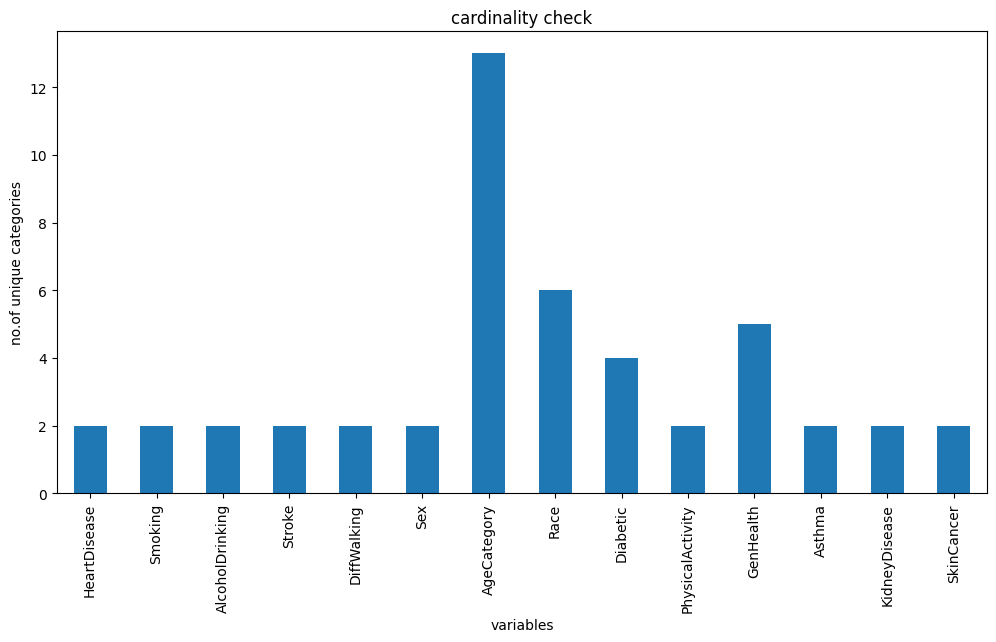

In [7]:
data_object=heart_df.select_dtypes(include="object")
data_object.nunique().plot.bar(figsize=(12,6))
plt.ylabel("no.of unique categories")
plt.xlabel("variables")
plt.title("cardinality check")
plt.show()

In [8]:
heart_df.info()
# no missing data
# object and float datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [9]:
heart_df.describe(include = 'all')

HeartDisease            BMI Smoking AlcoholDrinking  Stroke  \
count        319795  319795.000000  319795          319795  319795   
unique            2            NaN       2               2       2   
top              No            NaN      No              No      No   
freq         292422            NaN  187887          298018  307726   
mean            NaN      28.325399     NaN             NaN     NaN   
std             NaN       6.356100     NaN             NaN     NaN   
min             NaN      12.020000     NaN             NaN     NaN   
25%             NaN      24.030000     NaN             NaN     NaN   
50%             NaN      27.340000     NaN             NaN     NaN   
75%             NaN      31.420000     NaN             NaN     NaN   
max             NaN      94.850000     NaN             NaN     NaN   

        PhysicalHealth   MentalHealth DiffWalking     Sex AgeCategory    Race  \
count     319795.00000  319795.000000      319795  319795      319795  319795   
unique             NaN            NaN           2       2          13       6   
top                NaN            NaN          No  Female       65-69   White   
freq               NaN            NaN      275385  167805       34151  245212   
mean           3.37171       3.898366         NaN     NaN         NaN     NaN   
std            7.95085       7.955235         NaN     NaN         NaN     NaN   
min            0.00000       0.000000         NaN     NaN         NaN     NaN   
25%            0.00000       0.000000         NaN     NaN         NaN     NaN   
50%            0.00000       0.000000         NaN     NaN         NaN     NaN   
75%            2.00000       3.000000         NaN     NaN         NaN     NaN   
max           30.00000      30.000000         NaN     NaN         NaN     NaN   

       Diabetic PhysicalActivity  GenHealth      SleepTime  Asthma  \
count    319795           319795     319795  319795.000000  319795   
unique        4                2          5            NaN       2   
top          No              Yes  Very good            NaN      No   
freq     269653           247957     113858            NaN  276923   
mean        NaN              NaN        NaN       7.097075     NaN   
std         NaN              NaN        NaN       1.436007     NaN   
min         NaN              NaN        NaN       1.000000     NaN   
25%         NaN              NaN        NaN       6.000000     NaN   
50%         NaN              NaN        NaN       7.000000     NaN   
75%         NaN              NaN        NaN       8.000000     NaN   
max         NaN              NaN        NaN      24.000000     NaN   

       KidneyDisease SkinCancer  
count         319795     319795  
unique             2          2  
top               No         No  
freq          308016     289976  
mean             NaN        NaN  
std              NaN        NaN  
min              NaN        NaN  
25%              NaN        NaN  
50%              NaN        NaN  
75%              NaN        NaN  
max              NaN        NaN

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select relevant features (exclude non-numeric columns)
numeric_features = heart_df.select_dtypes(include=['float64'])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

# Perform PCA
n_components = 2  # You can choose the number of components
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(scaled_features)

# Create a new DataFrame with PCA results
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(n_components)])

# Add target variable (HeartDisease) if needed
pca_df['HeartDisease'] = heart_df['HeartDisease']

# Visualize the PCA results or use them for further analysis
print(pca_df.head())


        PC1       PC2 HeartDisease
0  1.917709 -2.962980           No
1 -0.959563 -0.987537           No
2  3.048865 -0.398508           No
3 -0.523157 -0.870849           No
4  1.160267  0.079458           No


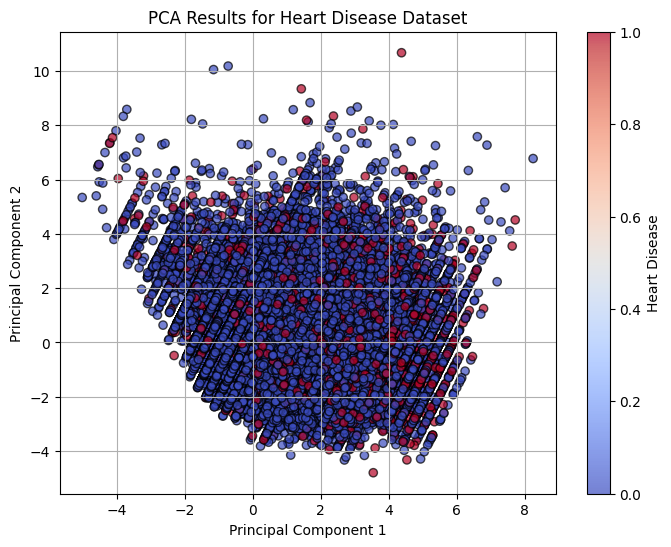

In [11]:
import matplotlib.pyplot as plt

# Assuming you have already performed PCA and have the pca_df DataFrame
# with the transformed features

# Map 'Yes' to 1 and 'No' to 0
pca_df['HeartDisease'] = pca_df['HeartDisease'].map({'Yes': 1, 'No': 0})

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['HeartDisease'], cmap='coolwarm', alpha=0.7, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results for Heart Disease Dataset')
plt.colorbar(label='Heart Disease')
plt.grid(True)
plt.show()



In [12]:
median_bmi = heart_df['BMI'].median()
print(f"Median BMI: {median_bmi:.2f}")
median_bmi = heart_df['SleepTime'].median()
print(f"Median SleepTime: {median_bmi:.2f}")
median_bmi = heart_df['PhysicalHealth'].median()
print(f"Median PhysicalHealth: {median_bmi:.2f}")
median_bmi = heart_df['MentalHealth'].median()
print(f"Median MentalHealth: {median_bmi:.2f}")

Median BMI: 27.34
Median SleepTime: 7.00
Median PhysicalHealth: 0.00
Median MentalHealth: 0.00


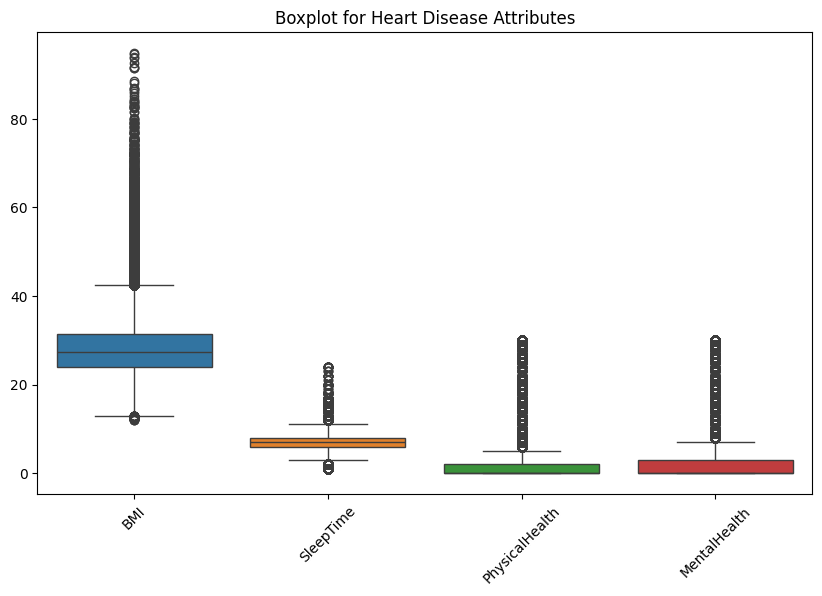

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have loaded the heart disease dataset (as 'df')
# Replace 'heart_df' with your actual DataFrame name

attributes = ['BMI', 'SleepTime', 'PhysicalHealth', 'MentalHealth', 'AgeCategory']
plt.figure(figsize=(10, 6))
sns.boxplot(data=heart_df[attributes])
plt.xticks(rotation=45)
plt.title("Boxplot for Heart Disease Attributes")
plt.show()


In [3]:
heart_cat = heart_df.select_dtypes(include=['object']).columns
heart_cat = heart_df[heart_cat]
print(heart_cat.shape)
heart_cat.head()

(319795, 14)


HeartDisease Smoking AlcoholDrinking Stroke DiffWalking     Sex  \
0           No     Yes              No     No          No  Female   
1           No      No              No    Yes          No  Female   
2           No     Yes              No     No          No    Male   
3           No      No              No     No          No  Female   
4           No      No              No     No         Yes  Female   

   AgeCategory   Race Diabetic PhysicalActivity  GenHealth Asthma  \
0        55-59  White      Yes              Yes  Very good    Yes   
1  80 or older  White       No              Yes  Very good     No   
2        65-69  White      Yes              Yes       Fair    Yes   
3        75-79  White       No               No       Good     No   
4        40-44  White       No              Yes  Very good     No   

  KidneyDisease SkinCancer  
0            No        Yes  
1            No         No  
2            No         No  
3            No        Yes  
4            No         No

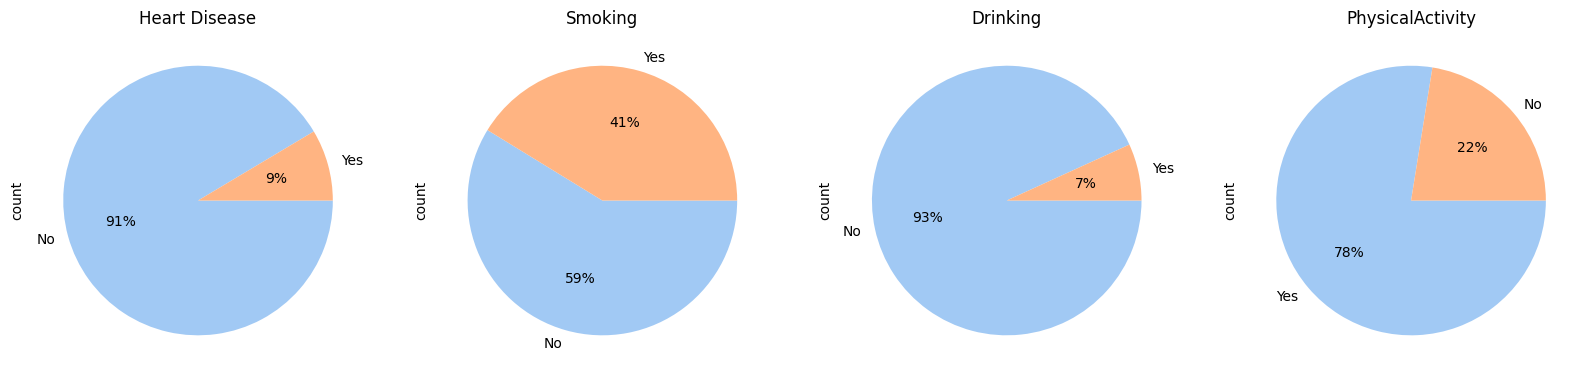

In [15]:
# class distribution
plt.figure(figsize=(20,20))
colors = sns.color_palette('pastel')

plt.subplot(1, 4, 1)    
heart_cat['HeartDisease'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('Heart Disease') # non_balanced target data

plt.subplot(1, 4, 2)    
heart_cat['Smoking'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('Smoking')

plt.subplot(1, 4, 3)    
heart_cat['AlcoholDrinking'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('Drinking')

plt.subplot(1, 4, 4)   
heart_df['PhysicalActivity'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('PhysicalActivity')

plt.show() 

In [4]:
# convert categorical data to numeric ordinal data 
heart_cat['HeartDisease'] = heart_cat['HeartDisease'].replace(['No', 'Yes'], [0, 1])
heart_cat['Smoking'] = heart_cat['Smoking'].replace(['No', 'Yes'], [0, 1])
heart_cat['AlcoholDrinking'] = heart_cat['AlcoholDrinking'].replace(['No', 'Yes'], [0, 1])
heart_cat['PhysicalActivity'] = heart_cat['PhysicalActivity'].replace(['No', 'Yes'], [0, 1])

heart_cat.head(1)

HeartDisease  Smoking  AlcoholDrinking Stroke DiffWalking     Sex  \
0             0        1                0     No          No  Female   

  AgeCategory   Race Diabetic  PhysicalActivity  GenHealth Asthma  \
0       55-59  White      Yes                 1  Very good    Yes   

  KidneyDisease SkinCancer  
0            No        Yes

In [17]:
heart_cat[['HeartDisease', 'Smoking', 'AlcoholDrinking', 'PhysicalActivity' ]].corr()[:1]
# non-smoking and Physical activity helps prevent heart disease.
# “moderate drinking is good for your heart” 

HeartDisease   Smoking  AlcoholDrinking  PhysicalActivity
HeartDisease           1.0  0.107764         -0.03208          -0.10003

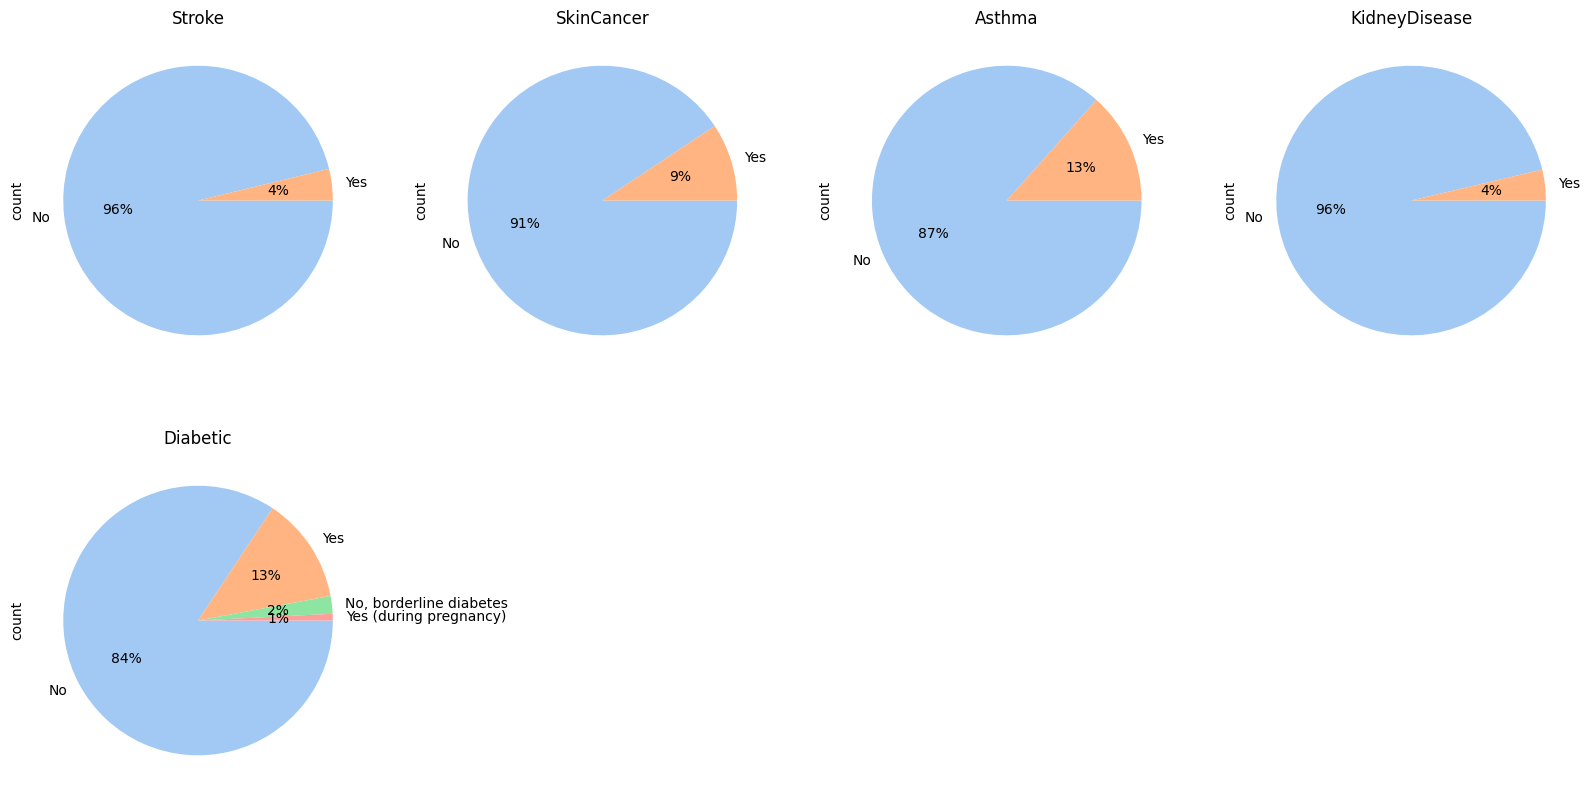

In [18]:
# class distribution
plt.figure(figsize=(20,10))
colors = sns.color_palette('pastel')

plt.subplot(2, 4, 1)    
heart_cat['Stroke'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('Stroke')

plt.subplot(2, 4, 2)    
heart_cat['SkinCancer'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('SkinCancer')

plt.subplot(2, 4, 3)    
heart_cat['Asthma'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('Asthma')

plt.subplot(2, 4, 4)    
heart_cat['KidneyDisease'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('KidneyDisease')

plt.subplot(2, 4, 5)    
heart_cat['Diabetic'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('Diabetic')

plt.show()

In [5]:
# convert categorical data to numeric ordinal data 
heart_cat['Stroke'] = heart_cat['Stroke'].replace(['No', 'Yes'], [0, 1])
heart_cat['SkinCancer'] = heart_cat['SkinCancer'].replace(['No', 'Yes'], [0, 1])
heart_cat['Asthma'] = heart_cat['Asthma'].replace(['No', 'Yes'], [0, 1]) # 천식
heart_cat['KidneyDisease'] = heart_cat['KidneyDisease'].replace(['No', 'Yes'], [0, 1])
heart_cat['Diabetic'] = (heart_cat['Diabetic'].
                        replace(['No', 'Yes (during pregnancy)', 'No, borderline diabetes', 'Yes'], 
                                [0, 1, 2, 3]))
heart_cat.head(1)

HeartDisease  Smoking  AlcoholDrinking  Stroke DiffWalking     Sex  \
0             0        1                0       0          No  Female   

  AgeCategory   Race  Diabetic  PhysicalActivity  GenHealth  Asthma  \
0       55-59  White         3                 1  Very good       1   

   KidneyDisease  SkinCancer  
0              0           1

In [20]:
heart_cat[['HeartDisease', 'Stroke', 'SkinCancer', 'Asthma', 'KidneyDisease', 'Diabetic' ]].corr()[:1]

HeartDisease    Stroke  SkinCancer    Asthma  KidneyDisease  \
HeartDisease           1.0  0.196835    0.093317  0.041444       0.145197   

              Diabetic  
HeartDisease  0.181858

In [8]:
# HeartDisease according to variables
HeartDisease_DiffWalking = heart_df.groupby(['DiffWalking', 'HeartDisease'], 
                                          as_index=False).agg(n = ('DiffWalking', 'count'))
HeartDisease_AgeCategory = heart_df.groupby(['AgeCategory', 'HeartDisease'], 
                                             as_index=False).agg(n = ('AgeCategory', 'count'))
HeartDisease_GenHealth = heart_df.groupby(['GenHealth', 'HeartDisease'], 
                                          as_index=False).agg(n = ('GenHealth', 'count'))

HeartDisease_Sex = heart_df.groupby(['Sex', 'HeartDisease'], 
                                          as_index=False).agg(n = ('Sex', 'count'))
HeartDisease_Race = heart_df.groupby(['Race', 'HeartDisease'], 
                                     as_index=False).agg(n = ('Race', 'count'))

In [22]:
# HeartDisease according to variables
HeartDisease_DiffWalking.head()

DiffWalking HeartDisease       n
0          No           No  258040
1          No          Yes   17345
2         Yes           No   34382
3         Yes          Yes   10028

In [23]:
HeartDisease_AgeCategory.head()

AgeCategory HeartDisease      n
0       18-24           No  20934
1       18-24          Yes    130
2       25-29           No  16822
3       25-29          Yes    133
4       30-34           No  18527

In [24]:
HeartDisease_GenHealth.head()

GenHealth HeartDisease      n
0  Excellent           No  65342
1  Excellent          Yes   1500
2       Fair           No  27593
3       Fair          Yes   7084
4       Good           No  83571

In [25]:
HeartDisease_Race.head()

Race HeartDisease      n
0  American Indian/Alaskan Native           No   4660
1  American Indian/Alaskan Native          Yes    542
2                           Asian           No   7802
3                           Asian          Yes    266
4                           Black           No  21210

In [26]:
HeartDisease_Sex.head()

Sex HeartDisease       n
0  Female           No  156571
1  Female          Yes   11234
2    Male           No  135851
3    Male          Yes   16139

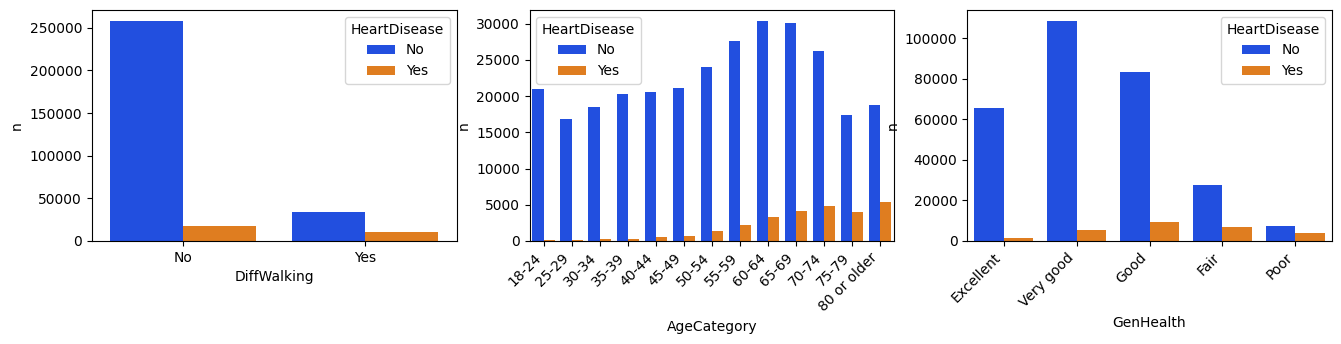

In [27]:
# barplot - HeartDisease according to variables
plt.figure(figsize=(16, 3))

plt.subplot(1, 3, 1)   
sns.barplot(data=HeartDisease_DiffWalking, x= 'DiffWalking', y = 'n', hue = "HeartDisease", 
            palette = 'bright', order = ['No', 'Yes'])

plt.subplot(1, 3, 2)  
plt.xticks(rotation=45, ha='right')
sns.barplot(data=HeartDisease_AgeCategory, x= 'AgeCategory', y = 'n', hue = "HeartDisease", 
            palette = 'bright', order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', 
                                         '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', 
                                         '80 or older'])

plt.subplot(1, 3, 3) 
plt.xticks(rotation=45, ha='right')
sns.barplot(data=HeartDisease_GenHealth, x= 'GenHealth', y = 'n', hue = "HeartDisease", 
            palette = 'bright', order = ['Excellent', 'Very good', 'Good', 'Fair','Poor'])

plt.show()

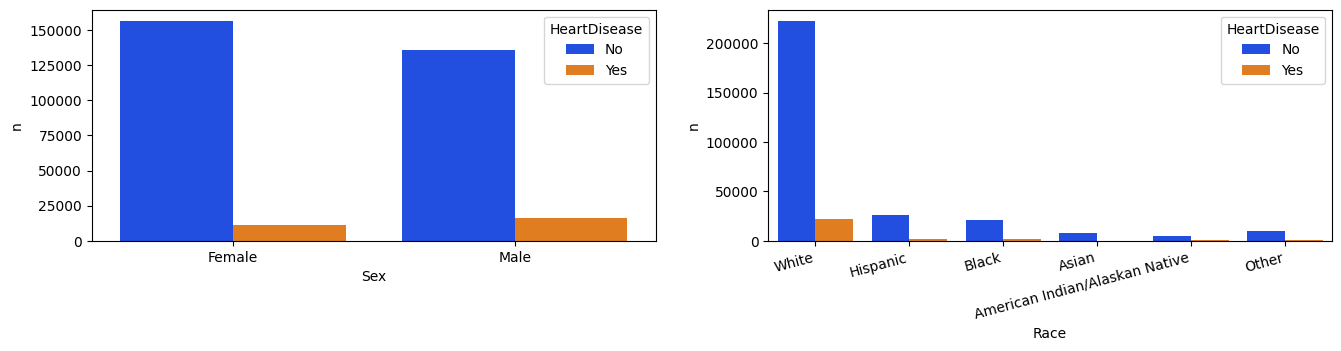

In [28]:
# barplot - HeartDisease according to variables

plt.figure(figsize=(16, 3))

plt.subplot(1, 2, 1)   
sns.barplot(data=HeartDisease_Sex, x= 'Sex', y = 'n', hue = "HeartDisease", palette = 'bright', 
            order = ['Female', 'Male'] )

plt.subplot(1, 2, 2)  
plt.xticks(rotation=15, ha='right')
sns.barplot(data=HeartDisease_Race, x= 'Race', y = 'n', hue = "HeartDisease", palette = 'bright', 
            order = ['White', 'Hispanic', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Other'] )

plt.show()

# Gender may be ordinal in heartdisease, but race is not.

In [6]:
# convert categorical data to numeric ordinal data  data 
heart_cat['Sex'] = heart_cat['Sex'].replace(['Female', 'Male'], [0, 1])
heart_cat.head(1)

HeartDisease  Smoking  AlcoholDrinking  Stroke DiffWalking  Sex  \
0             0        1                0       0          No    0   

  AgeCategory   Race  Diabetic  PhysicalActivity  GenHealth  Asthma  \
0       55-59  White         3                 1  Very good       1   

   KidneyDisease  SkinCancer  
0              0           1

In [30]:
heart_cat[['HeartDisease', 'Sex']].corr()[:1]

HeartDisease      Sex
HeartDisease           1.0  0.07004

In [7]:
# one_hot_encoding for heart_cat['Race']
Race_ohe = pd.get_dummies(heart_cat['Race'], columns = 'Race', dtype=int, drop_first=False)
Race_ohe.describe()[:2]

American Indian/Alaskan Native          Asian         Black  \
count                   319795.000000  319795.000000  319795.00000   
mean                         0.016267       0.025229       0.07173   

            Hispanic          Other          White  
count  319795.000000  319795.000000  319795.000000  
mean        0.085824       0.034172       0.766779

In [8]:
heart_cat_temp = heart_cat.drop(['Race'], axis=1)

In [9]:
heart_cat = pd.concat([heart_cat_temp, Race_ohe], axis=1)
print(heart_cat.shape)
heart_cat.head()

(319795, 19)


HeartDisease  Smoking  AlcoholDrinking  Stroke DiffWalking  Sex  \
0             0        1                0       0          No    0   
1             0        0                0       1          No    0   
2             0        1                0       0          No    1   
3             0        0                0       0          No    0   
4             0        0                0       0         Yes    0   

   AgeCategory  Diabetic  PhysicalActivity  GenHealth  Asthma  KidneyDisease  \
0        55-59         3                 1  Very good       1              0   
1  80 or older         0                 1  Very good       0              0   
2        65-69         3                 1       Fair       1              0   
3        75-79         0                 0       Good       0              0   
4        40-44         0                 1  Very good       0              0   

   SkinCancer  American Indian/Alaskan Native  Asian  Black  Hispanic  Other  \
0           1                               0      0      0         0      0   
1           0                               0      0      0         0      0   
2           0                               0      0      0         0      0   
3           1                               0      0      0         0      0   
4           0                               0      0      0         0      0   

   White  
0      1  
1      1  
2      1  
3      1  
4      1

In [10]:
# numeric variables
heart_num = heart_df.select_dtypes(include=['float']).columns
heart_num = heart_df[heart_num]
heart_num_heartdisease = pd.concat([heart_num, heart_cat[['HeartDisease']]], axis=1)
print(heart_num_heartdisease.shape)
heart_num_heartdisease.head()

(319795, 5)


BMI  PhysicalHealth  MentalHealth  SleepTime  HeartDisease
0  16.60             3.0          30.0        5.0             0
1  20.34             0.0           0.0        7.0             0
2  26.58            20.0          30.0        8.0             0
3  24.21             0.0           0.0        6.0             0
4  23.71            28.0           0.0        8.0             0

In [35]:
heart_num_heartdisease[['HeartDisease', 'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']].corr()[:1]

HeartDisease       BMI  PhysicalHealth  MentalHealth  SleepTime
HeartDisease           1.0  0.051803        0.170721      0.028591   0.008327

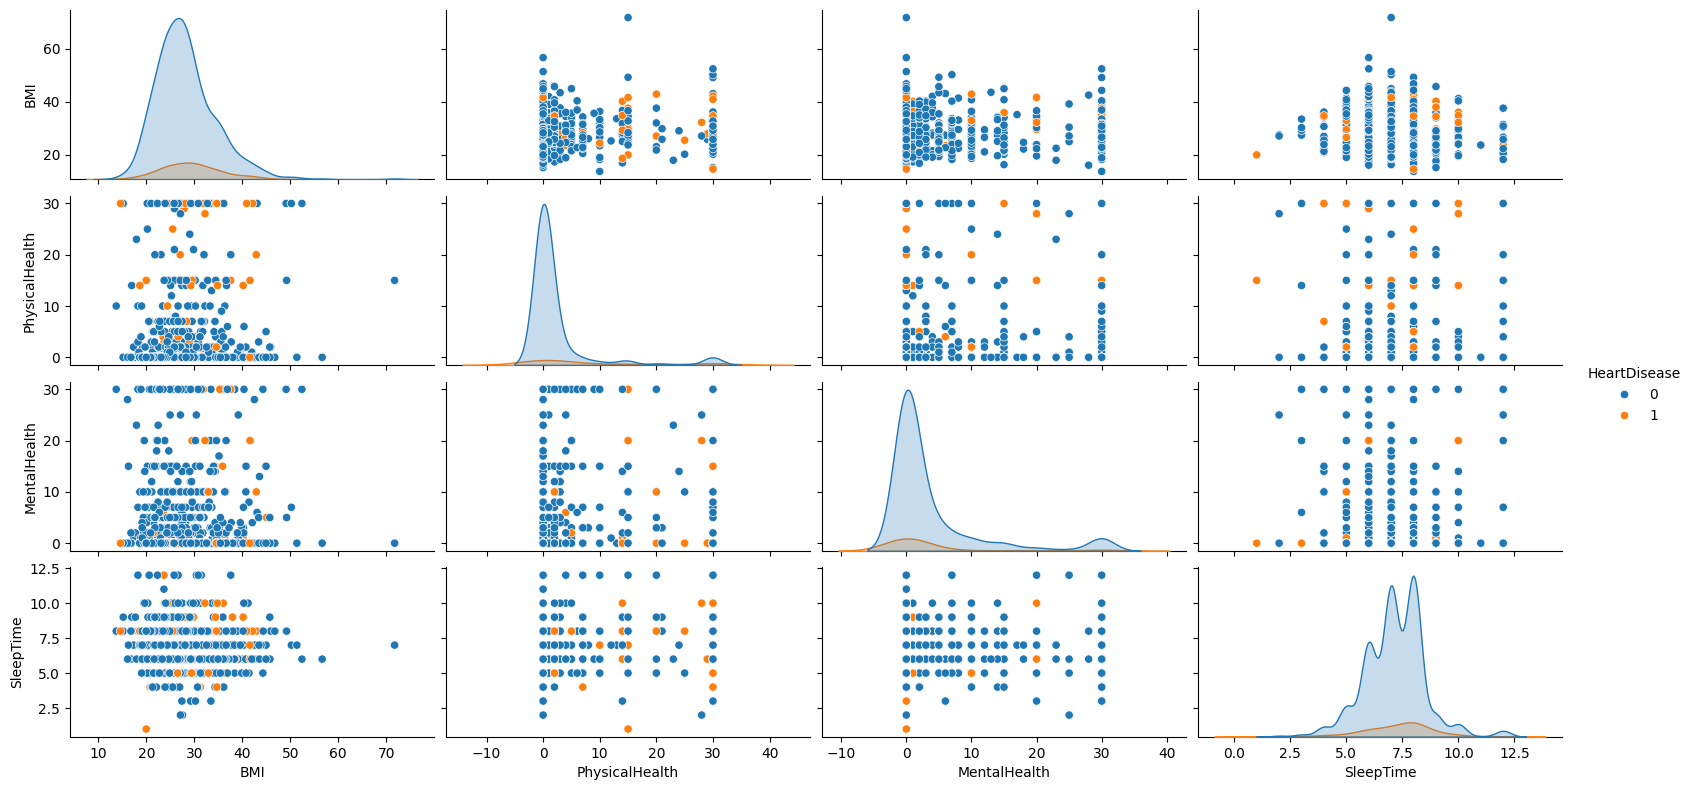

In [36]:
heart_num_sample = heart_num_heartdisease.sample(1000)
sns.pairplot(heart_num_sample, hue = "HeartDisease", size = 2, height=1.5, aspect=2)
plt.show()

In [ ]:
import seaborn as sns
sns.pairplot(heart_all,hue = "HeartDisease", size = 2, height=1.5, aspect=2)
plt.show()

In [77]:
#import seaborn as sns
#import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with the specified attributes
# Replace 'df' with your actual dataset

#attributes = ['Smoking', 'BMI', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth']
#sns.pairplot(heart_df[attributes])
#plt.show()


In [11]:
heart_all = pd.concat([heart_cat, heart_num], axis=1)
heart_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   HeartDisease                    319795 non-null  int64  
 1   Smoking                         319795 non-null  int64  
 2   AlcoholDrinking                 319795 non-null  int64  
 3   Stroke                          319795 non-null  int64  
 4   DiffWalking                     319795 non-null  object 
 5   Sex                             319795 non-null  int64  
 6   AgeCategory                     319795 non-null  object 
 7   Diabetic                        319795 non-null  int64  
 8   PhysicalActivity                319795 non-null  int64  
 9   GenHealth                       319795 non-null  object 
 10  Asthma                          319795 non-null  int64  
 11  KidneyDisease                   319795 non-null  int64  
 12  SkinCancer      

Explained variance ratio: [0.15671883 0.12734461 0.11835258 0.11068508 0.10433169]


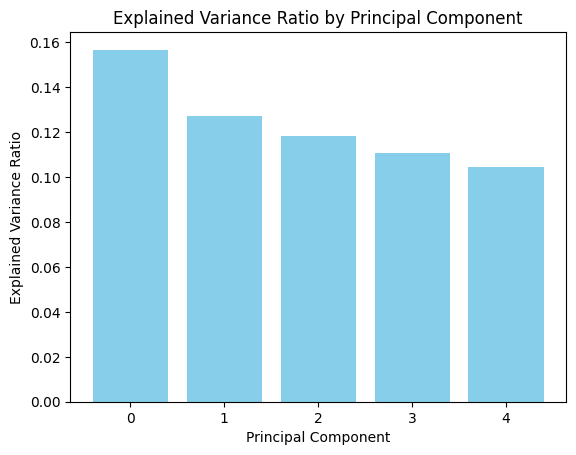

In [79]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming df3 is your DataFrame with features and target variable
# Select only numerical columns
numerical_columns = heart_cat.select_dtypes(include=['float64', 'int64']).columns
X = heart_all[numerical_columns].drop(columns=['HeartDisease'])  # Features (excluding the target variable)
y = heart_all['HeartDisease']  # Target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=5)  # Specify the number of components to keep
X_pca = pca.fit_transform(X_scaled)

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Visualize the explained variance ratio
import matplotlib.pyplot as plt
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()


In [80]:
# Get the absolute values of the PCA components
abs_components = np.abs(pca.components_)

# Get the indices of top features for each principal component
top_feature_indices = np.argsort(abs_components, axis=1)[:, ::-1]

# Get the column names of the top features
top_feature_names = np.array(X.columns)[top_feature_indices]

# Print the top features for each principal component
for i, component in enumerate(top_feature_names):
    print(f"Top features for Principal Component {i}: {component}")

Top features for Principal Component 0: ['Diabetic' 'KidneyDisease' 'PhysicalActivity' 'Stroke' 'Smoking' 'Asthma'
 'SkinCancer' 'AlcoholDrinking' 'Sex']
Top features for Principal Component 1: ['Smoking' 'AlcoholDrinking' 'Sex' 'Asthma' 'KidneyDisease' 'SkinCancer'
 'Diabetic' 'PhysicalActivity' 'Stroke']
Top features for Principal Component 2: ['Sex' 'Asthma' 'AlcoholDrinking' 'SkinCancer' 'PhysicalActivity'
 'Smoking' 'KidneyDisease' 'Diabetic' 'Stroke']
Top features for Principal Component 3: ['SkinCancer' 'PhysicalActivity' 'Sex' 'Asthma' 'AlcoholDrinking'
 'Diabetic' 'KidneyDisease' 'Stroke' 'Smoking']
Top features for Principal Component 4: ['Asthma' 'Sex' 'PhysicalActivity' 'AlcoholDrinking' 'SkinCancer' 'Stroke'
 'Smoking' 'KidneyDisease' 'Diabetic']


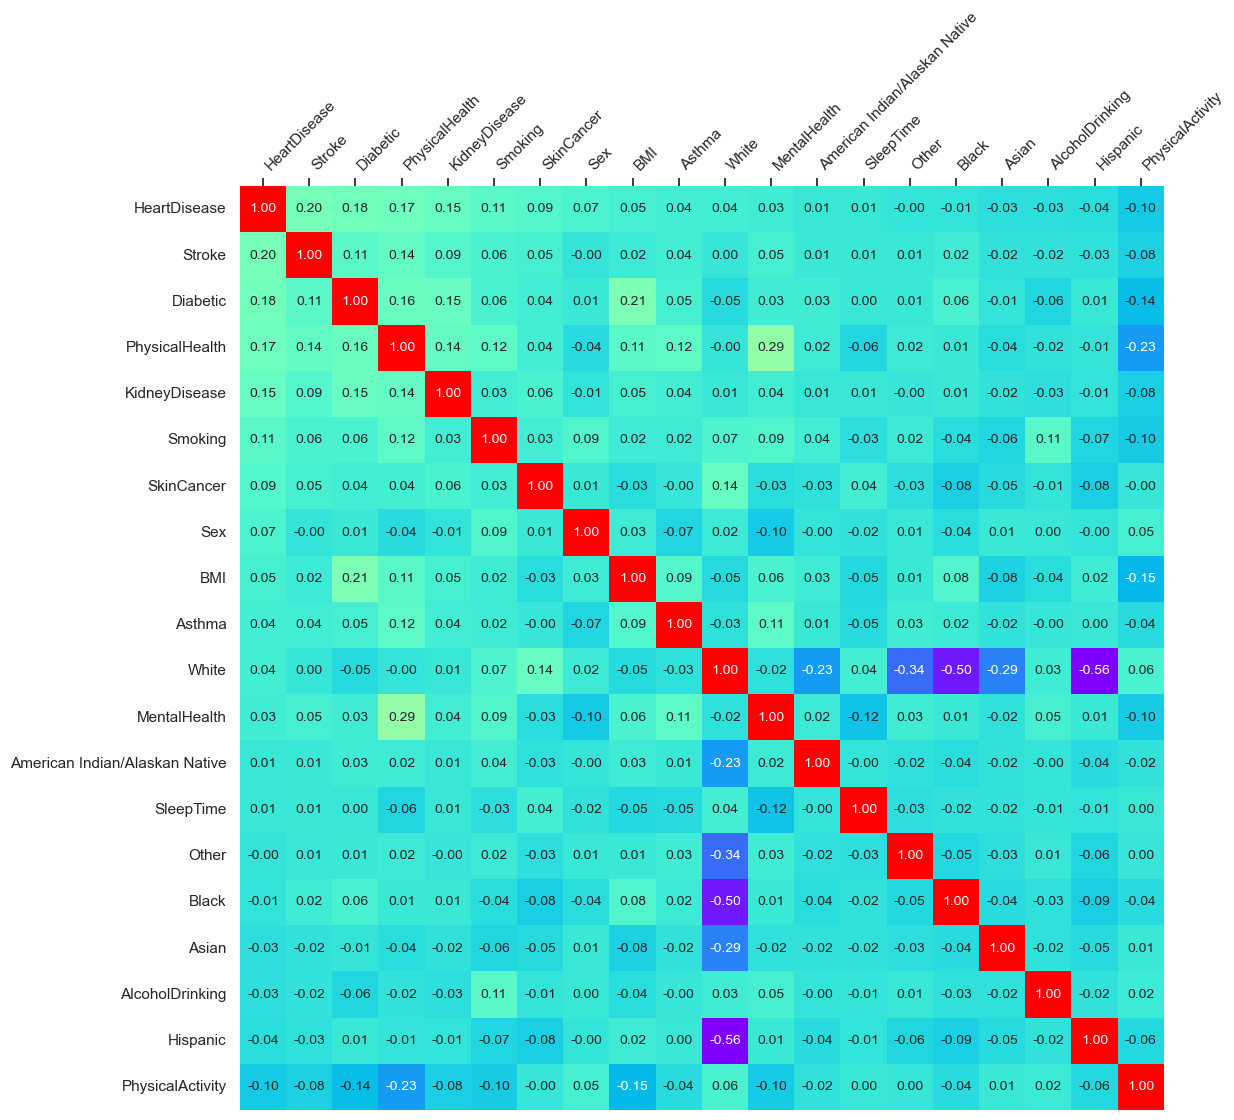

In [13]:
# correlation with HeartDisease
# Convert non-numeric columns to numeric format
# Drop non-numeric columns
numeric_columns = heart_all.select_dtypes(include=[np.number]).columns
heart_numeric = heart_all[numeric_columns]

# Calculate correlation matrix
corrmat = heart_numeric.corr()
plt.figure(figsize=(12, 12))
k=23
cols = corrmat.nlargest(k, 'HeartDisease')['HeartDisease'].index
cm = np.corrcoef(heart_all[cols].values.T)
sns.set(font_scale=1.)
hm = sns.heatmap(cm, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values, 
                 cmap="rainbow", cbar_kws={"shrink": 0.8})
hm.xaxis.tick_top()
plt.xticks(rotation=45, ha='left')
plt.show()

In [82]:
target = heart_all['HeartDisease']
feature = heart_all.drop(['HeartDisease'], axis=1)
target.shape, feature.shape

((319795,), (319795, 22))

In [83]:
!pip install sklearn

ERROR: Could not find a version that satisfies the requirement sklearn (from versions: none)
ERROR: No matching distribution found for sklearn


In [84]:
!pip install scikit-learn

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, random_state = 2401)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((239846, 22), (79949, 22), (239846,), (79949,))

In [86]:
df=heart_df

In [87]:
df.describe()

BMI  PhysicalHealth   MentalHealth      SleepTime  \
count  319795.000000   319795.000000  319795.000000  319795.000000   
mean        0.196854        0.112390       0.129946       0.265090   
std         0.076737        0.265028       0.265175       0.062435   
min         0.000000        0.000000       0.000000       0.000000   
25%         0.144996        0.000000       0.000000       0.217391   
50%         0.184957        0.000000       0.000000       0.260870   
75%         0.234215        0.066667       0.100000       0.304348   
max         1.000000        1.000000       1.000000       1.000000   

          BMI_Binned  BMI_Binned_EqualWidth  
count  319793.000000          319793.000000  
mean        0.054673               0.054673  
std         0.229844               0.229844  
min         0.000000               0.000000  
25%         0.000000               0.000000  
50%         0.000000               0.000000  
75%         0.000000               0.000000  
max         2.000000               2.000000

In [88]:
df.duplicated().sum()

17979

In [89]:
df = df.drop_duplicates()

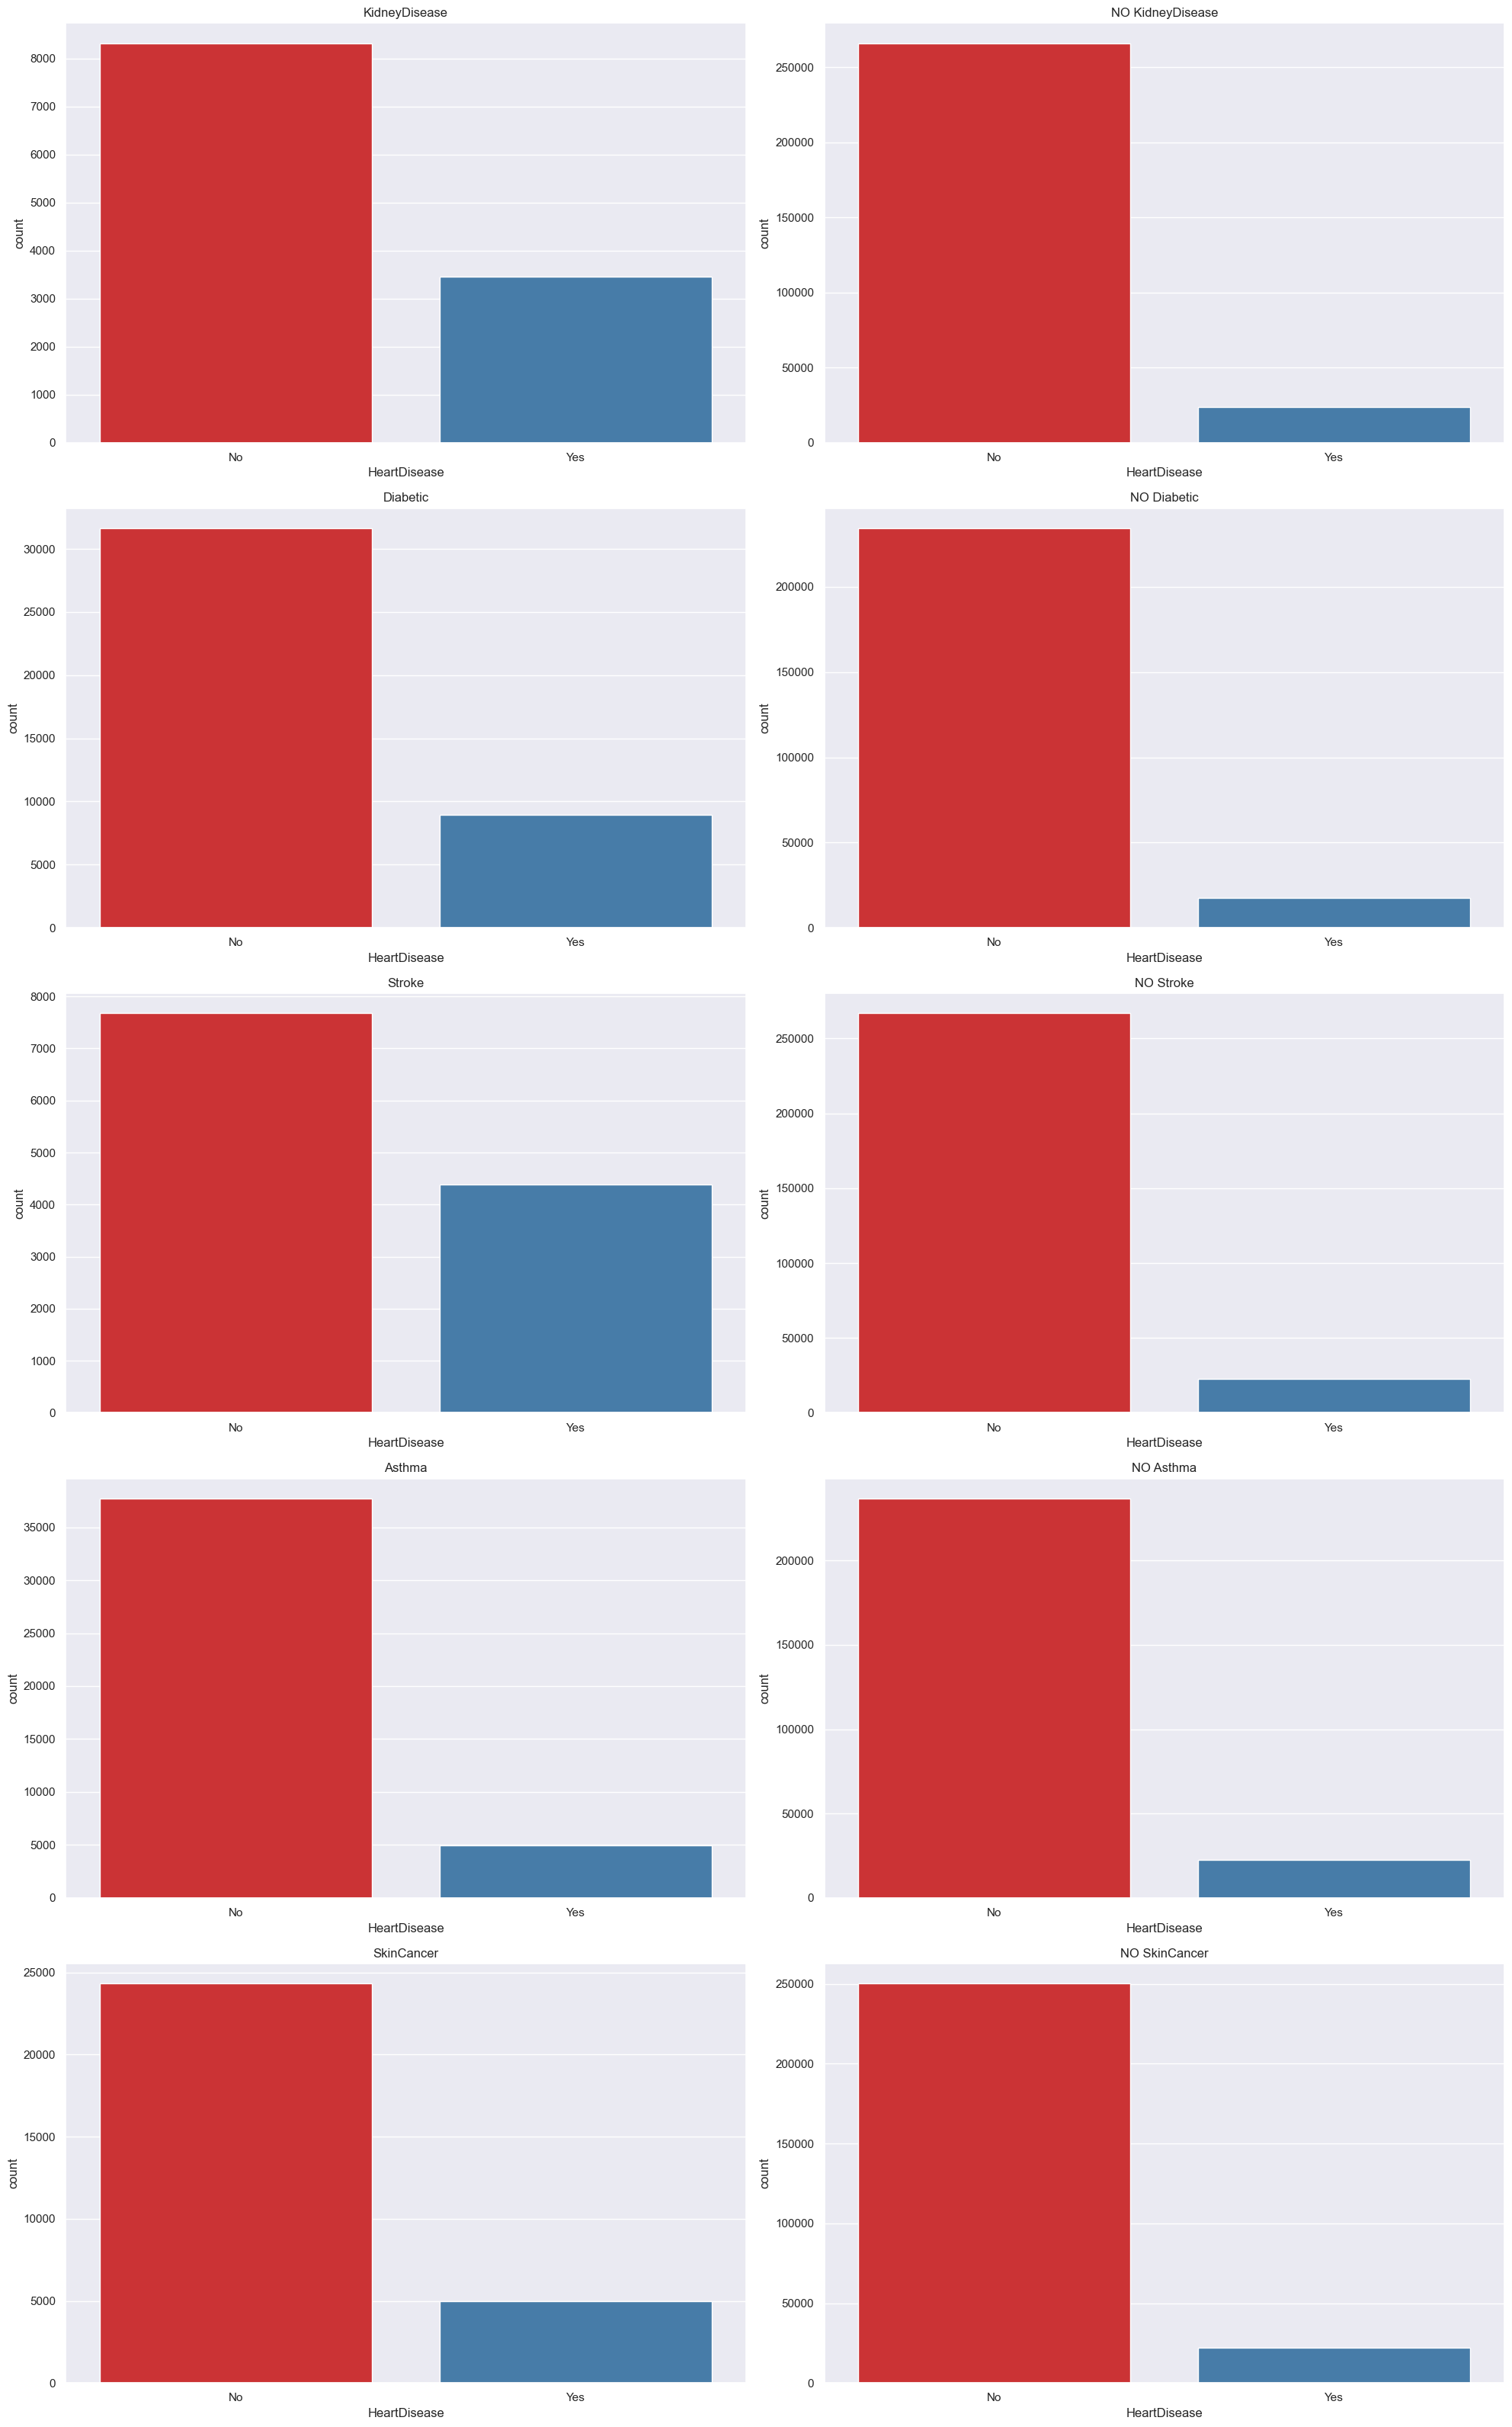

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the data
# Make sure to replace 'HeartDisease' with the actual column name for Heart Disease in your DataFrame

df = df.drop_duplicates()
cols = ['KidneyDisease', 'Diabetic', 'Stroke', 'Asthma', 'SkinCancer']

# Create subplots
fig, ax = plt.subplots(5, 2, figsize=(20, 32))
i = 0

for col in cols:
    df_yes = df[df[col] == 'Yes']
    df_no = df[df[col] == 'No']

    # Use countplot for Yes
    sns.countplot(data=df_yes, x='HeartDisease', ax=ax[i][0], palette='Set1').set_title(col)
    
    # Use countplot for No
    sns.countplot(data=df_no, x='HeartDisease', ax=ax[i][1], palette='Set1').set_title("NO " + col)
    
    i += 1

plt.tight_layout()
plt.show()


In [91]:
!pip install plotly

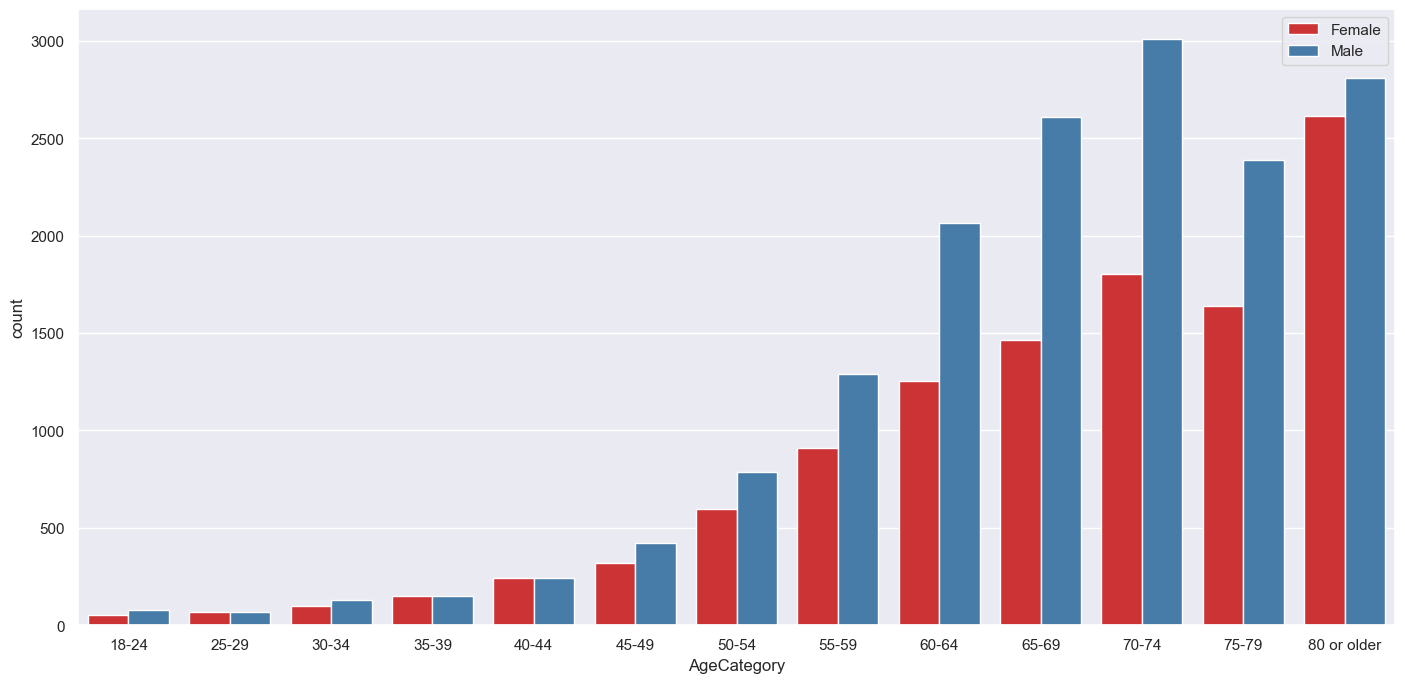

In [92]:
order = pd.unique(df.AgeCategory.values)
order.sort()
plt.figure(figsize = (17,8))
sns.countplot(data=df[df['HeartDisease']=='Yes'], x='AgeCategory', hue='Sex', palette='Set1', order=order)
plt.legend(['Female','Male'])
plt.show()

<Axes: xlabel='HeartDisease', ylabel='count'>

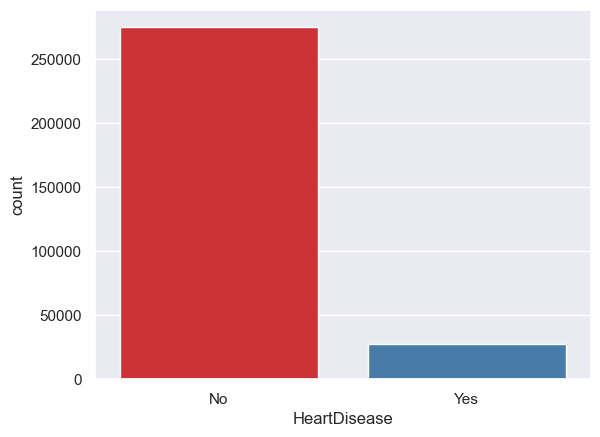

In [93]:
#px.pie(df,names ="HeartDisease",color='HeartDisease',color_discrete_map={'Yes':'rgb(79, 129, 102)',
 #                                'No':'rgb(33, 75, 99)'})
sns.countplot(data=df,x='HeartDisease',palette='Set1')

In [94]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#heart_df = pd.read_csv('heart.csv')
#df=heart_df.columns

numeric_columns = heart_df.select_dtypes(include=[int, float]).columns

scaler = MinMaxScaler()
heart_df[numeric_columns] = scaler.fit_transform(heart_df[numeric_columns])

print(heart_df.shape)
heart_df.head(5)

(319795, 23)


HeartDisease       BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  0.055294     Yes              No     No        0.100000   
1           No  0.100447      No              No    Yes        0.000000   
2           No  0.175782     Yes              No     No        0.666667   
3           No  0.147169      No              No     No        0.000000   
4           No  0.141132      No              No     No        0.933333   

   MentalHealth DiffWalking     Sex  AgeCategory  ...  GenHealth SleepTime  \
0           1.0          No  Female        55-59  ...  Very good  0.173913   
1           0.0          No  Female  80 or older  ...  Very good  0.260870   
2           1.0          No    Male        65-69  ...       Fair  0.304348   
3           0.0          No  Female        75-79  ...       Good  0.217391   
4           0.0         Yes  Female        40-44  ...  Very good  0.304348   

  Asthma KidneyDisease  SkinCancer equal_width_bins equal_frequency_bins  \
0    Yes            No         Yes            Bin 1                Bin 1   
1     No            No          No            Bin 2                Bin 1   
2    Yes            No          No            Bin 2                Bin 5   
3     No            No         Yes            Bin 2                Bin 3   
4     No            No          No            Bin 2                Bin 3   

  BMI_Binned BMI_Binned_EqualWidth BMI_Binned_EqualFreq  
0        0.0                   0.0                Bin 1  
1        0.0                   0.0                Bin 1  
2        0.0                   0.0                Bin 2  
3        0.0                   0.0                Bin 1  
4        0.0                   0.0                Bin 1  

[5 rows x 23 columns]

In [95]:
df=pd.read_csv(r"C:\Users\VALU\Downloads\archive (3)\2020\heart_2020_cleaned.csv")

In [12]:
heart_all.tail(30)
heart_all["GenHealth"]=heart_all["GenHealth"].replace(["Excellent","Very good","Good","Fair","Poor"],[0,1,2,3,4])
heart_all.head(5)

HeartDisease  Smoking  AlcoholDrinking  Stroke DiffWalking  Sex  \
0             0        1                0       0          No    0   
1             0        0                0       1          No    0   
2             0        1                0       0          No    1   
3             0        0                0       0          No    0   
4             0        0                0       0         Yes    0   

   AgeCategory  Diabetic  PhysicalActivity  GenHealth  ...  \
0        55-59         3                 1          1  ...   
1  80 or older         0                 1          1  ...   
2        65-69         3                 1          3  ...   
3        75-79         0                 0          2  ...   
4        40-44         0                 1          1  ...   

   American Indian/Alaskan Native  Asian  Black  Hispanic  Other  White  \
0                               0      0      0         0      0      1   
1                               0      0      0         0      0      1   
2                               0      0      0         0      0      1   
3                               0      0      0         0      0      1   
4                               0      0      0         0      0      1   

     BMI  PhysicalHealth  MentalHealth  SleepTime  
0  16.60             3.0          30.0        5.0  
1  20.34             0.0           0.0        7.0  
2  26.58            20.0          30.0        8.0  
3  24.21             0.0           0.0        6.0  
4  23.71            28.0           0.0        8.0  

[5 rows x 23 columns]

In [ ]:
df=pd.read_csv("heart_2020_cleaned.csv")
df.head(5)

In [15]:
heart_all['DiffWalking']=heart_all['DiffWalking'].replace(['No','Yes'],[0,1])
heart_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   HeartDisease                    319795 non-null  int64  
 1   Smoking                         319795 non-null  int64  
 2   AlcoholDrinking                 319795 non-null  int64  
 3   Stroke                          319795 non-null  int64  
 4   DiffWalking                     319795 non-null  int64  
 5   Sex                             319795 non-null  int64  
 6   AgeCategory                     319795 non-null  object 
 7   Diabetic                        319795 non-null  int64  
 8   PhysicalActivity                319795 non-null  int64  
 9   GenHealth                       319795 non-null  int64  
 10  Asthma                          319795 non-null  int64  
 11  KidneyDisease                   319795 non-null  int64  
 12  SkinCancer      

In [ ]:
df['HeartDisease'] = df['HeartDisease'].replace(['No', 'Yes'], [0, 1])
df['Smoking'] = df['Smoking'].replace(['No', 'Yes'], [0, 1])
df['AlcoholDrinking'] = df['AlcoholDrinking'].replace(['No', 'Yes'], [0, 1])
df['PhysicalActivity'] =df['PhysicalActivity'].replace(['No', 'Yes'], [0, 1])

df.head(1)

In [99]:
df['Stroke'] = df['Stroke'].replace(['No', 'Yes'], [0, 1])
df['SkinCancer'] = df['SkinCancer'].replace(['No', 'Yes'], [0, 1])
df['Asthma'] = df['Asthma'].replace(['No', 'Yes'], [0, 1]) 
df['KidneyDisease'] =df['KidneyDisease'].replace(['No', 'Yes'], [0, 1])
df['Diabetic'] = df['Diabetic'].replace(['No', 'Yes (during pregnancy)', 'No, borderline diabetes', 'Yes'], [0, 1, 2, 3])
df.head(1)

HeartDisease   BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.6        1                0       0             3.0   

   MentalHealth DiffWalking     Sex AgeCategory   Race  Diabetic  \
0          30.0          No  Female       55-59  White         3   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1  Very good        5.0       1              0           1

In [100]:
df["GenHealth"]=df["GenHealth"].replace(["Excellent","Very good","Good","Fair","Poor"],[0,1,2,3,4])
df["Sex"]=df["Sex"].replace(["Female","Male"],[1,0])
df.head(1)

HeartDisease   BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.6        1                0       0             3.0   

   MentalHealth DiffWalking  Sex AgeCategory   Race  Diabetic  \
0          30.0          No    1       55-59  White         3   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1          1        5.0       1              0           1

In [101]:
df1 = pd.get_dummies(df['Race'], columns = 'Race', dtype=int, drop_first=False)
df1.describe()[:2]

American Indian/Alaskan Native          Asian         Black  \
count                   319795.000000  319795.000000  319795.00000   
mean                         0.016267       0.025229       0.07173   

            Hispanic          Other          White  
count  319795.000000  319795.000000  319795.000000  
mean        0.085824       0.034172       0.766779

In [102]:
df1.head(1)

American Indian/Alaskan Native  Asian  Black  Hispanic  Other  White
0                               0      0      0         0      0      1

In [103]:
df = df.drop(['Race'], axis=1)

In [104]:
df = pd.concat([df,df1], axis=1)
print(df.shape)
df.head()

(319795, 23)


HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   

   MentalHealth DiffWalking  Sex  AgeCategory  ...  SleepTime  Asthma  \
0          30.0          No    1        55-59  ...        5.0       1   
1           0.0          No    1  80 or older  ...        7.0       0   
2          30.0          No    0        65-69  ...        8.0       1   
3           0.0          No    1        75-79  ...        6.0       0   
4           0.0         Yes    1        40-44  ...        8.0       0   

   KidneyDisease  SkinCancer  American Indian/Alaskan Native  Asian  Black  \
0              0           1                               0      0      0   
1              0           0                               0      0      0   
2              0           0                               0      0      0   
3              0           1                               0      0      0   
4              0           0                               0      0      0   

   Hispanic  Other  White  
0         0      0      1  
1         0      0      1  
2         0      0      1  
3         0      0      1  
4         0      0      1  

[5 rows x 23 columns]

In [105]:
df['DiffWalking'] = df['DiffWalking'].replace(['No', 'Yes'], [0, 1])
df.head()

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   

   MentalHealth  DiffWalking  Sex  AgeCategory  ...  SleepTime  Asthma  \
0          30.0            0    1        55-59  ...        5.0       1   
1           0.0            0    1  80 or older  ...        7.0       0   
2          30.0            0    0        65-69  ...        8.0       1   
3           0.0            0    1        75-79  ...        6.0       0   
4           0.0            1    1        40-44  ...        8.0       0   

   KidneyDisease  SkinCancer  American Indian/Alaskan Native  Asian  Black  \
0              0           1                               0      0      0   
1              0           0                               0      0      0   
2              0           0                               0      0      0   
3              0           1                               0      0      0   
4              0           0                               0      0      0   

   Hispanic  Other  White  
0         0      0      1  
1         0      0      1  
2         0      0      1  
3         0      0      1  
4         0      0      1  

[5 rows x 23 columns]

In [106]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Select only numeric columns for normalization
numeric_columns = df.select_dtypes(include=[int, float]).columns

# Normalize the data using Z-score normalization
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Print the shape of the DataFrame
print(df.shape)

# Print the first 10 rows transposed
df.head(10)

(319795, 23)


HeartDisease       BMI   Smoking  AlcoholDrinking    Stroke  \
0     -0.305954 -1.844750  1.193474         -0.27032 -0.198040   
1     -0.305954 -1.256338 -0.837890         -0.27032  5.049478   
2     -0.305954 -0.274603  1.193474         -0.27032 -0.198040   
3     -0.305954 -0.647473 -0.837890         -0.27032 -0.198040   
4     -0.305954 -0.726138 -0.837890         -0.27032 -0.198040   
5      3.268465  0.085682  1.193474         -0.27032 -0.198040   
6     -0.305954 -1.053383 -0.837890         -0.27032 -0.198040   
7     -0.305954  0.521484  1.193474         -0.27032 -0.198040   
8     -0.305954 -0.295055 -0.837890         -0.27032 -0.198040   
9     -0.305954  1.945316 -0.837890         -0.27032 -0.198040   

   PhysicalHealth  MentalHealth  DiffWalking       Sex  AgeCategory  ...  \
0       -0.046751      3.281069    -0.401578  0.951711        55-59  ...   
1       -0.424070     -0.490039    -0.401578  0.951711  80 or older  ...   
2        2.091388      3.281069    -0.401578 -1.050739        65-69  ...   
3       -0.424070     -0.490039    -0.401578  0.951711        75-79  ...   
4        3.097572     -0.490039     2.490174  0.951711        40-44  ...   
5        0.330568     -0.490039     2.490174  0.951711        75-79  ...   
6        1.462524     -0.490039    -0.401578  0.951711        70-74  ...   
7        0.204795     -0.490039     2.490174  0.951711  80 or older  ...   
8       -0.424070     -0.490039    -0.401578  0.951711  80 or older  ...   
9       -0.424070     -0.490039     2.490174 -1.050739        65-69  ...   

   SleepTime    Asthma  KidneyDisease  SkinCancer  \
0  -1.460354  2.541515      -0.195554    3.118419   
1  -0.067601 -0.393466      -0.195554   -0.320675   
2   0.628776  2.541515      -0.195554   -0.320675   
3  -0.763977 -0.393466      -0.195554    3.118419   
4   0.628776 -0.393466      -0.195554   -0.320675   
5   3.414282 -0.393466      -0.195554   -0.320675   
6  -2.156730  2.541515      -0.195554    3.118419   
7   1.325152  2.541515      -0.195554   -0.320675   
8  -1.460354 -0.393466       5.113667   -0.320675   
9   2.021529 -0.393466      -0.195554   -0.320675   

   American Indian/Alaskan Native     Asian     Black  Hispanic     Other  \
0                       -0.128591 -0.160878 -0.277980   -0.3064 -0.188098   
1                       -0.128591 -0.160878 -0.277980   -0.3064 -0.188098   
2                       -0.128591 -0.160878 -0.277980   -0.3064 -0.188098   
3                       -0.128591 -0.160878 -0.277980   -0.3064 -0.188098   
4                       -0.128591 -0.160878 -0.277980   -0.3064 -0.188098   
5                       -0.128591 -0.160878  3.597375   -0.3064 -0.188098   
6                       -0.128591 -0.160878 -0.277980   -0.3064 -0.188098   
7                       -0.128591 -0.160878 -0.277980   -0.3064 -0.188098   
8                       -0.128591 -0.160878 -0.277980   -0.3064 -0.188098   
9                       -0.128591 -0.160878 -0.277980   -0.3064 -0.188098   

      White  
0  0.551505  
1  0.551505  
2  0.551505  
3  0.551505  
4  0.551505  
5 -1.813222  
6  0.551505  
7  0.551505  
8  0.551505  
9  0.551505  

[10 rows x 23 columns]

In [107]:
heart_all['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [18]:

heart_all['DiffWalking'] =heart_all['DiffWalking'].replace(['No', 'Yes'], [0, 1])
heart_all['AgeCategory'] =heart_all['AgeCategory'].replace(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74','60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'], [0, 1,2,3,4,5,6,7,8,9,10,11,12])
heart_all.head(5)
heart_all.head(10).T

0      1      2      3      4      5  \
HeartDisease                     0.0   0.00   0.00   0.00   0.00   1.00   
Smoking                          1.0   0.00   1.00   0.00   0.00   1.00   
AlcoholDrinking                  0.0   0.00   0.00   0.00   0.00   0.00   
Stroke                           0.0   1.00   0.00   0.00   0.00   0.00   
DiffWalking                      0.0   0.00   0.00   0.00   1.00   1.00   
Sex                              0.0   0.00   1.00   0.00   0.00   0.00   
AgeCategory                      0.0   1.00   2.00   3.00   4.00   3.00   
Diabetic                         3.0   0.00   3.00   0.00   0.00   0.00   
PhysicalActivity                 1.0   1.00   1.00   0.00   1.00   0.00   
GenHealth                        1.0   1.00   3.00   2.00   1.00   3.00   
Asthma                           1.0   0.00   1.00   0.00   0.00   0.00   
KidneyDisease                    0.0   0.00   0.00   0.00   0.00   0.00   
SkinCancer                       1.0   0.00   0.00   1.00   0.00   0.00   
American Indian/Alaskan Native   0.0   0.00   0.00   0.00   0.00   0.00   
Asian                            0.0   0.00   0.00   0.00   0.00   0.00   
Black                            0.0   0.00   0.00   0.00   0.00   1.00   
Hispanic                         0.0   0.00   0.00   0.00   0.00   0.00   
Other                            0.0   0.00   0.00   0.00   0.00   0.00   
White                            1.0   1.00   1.00   1.00   1.00   0.00   
BMI                             16.6  20.34  26.58  24.21  23.71  28.87   
PhysicalHealth                   3.0   0.00  20.00   0.00  28.00   6.00   
MentalHealth                    30.0   0.00  30.00   0.00   0.00   0.00   
SleepTime                        5.0   7.00   8.00   6.00   8.00  12.00   

                                    6      7      8      9  
HeartDisease                     0.00   0.00   0.00   0.00  
Smoking                          0.00   1.00   0.00   0.00  
AlcoholDrinking                  0.00   0.00   0.00   0.00  
Stroke                           0.00   0.00   0.00   0.00  
DiffWalking                      0.00   1.00   0.00   1.00  
Sex                              0.00   0.00   0.00   1.00  
AgeCategory                      5.00   1.00   1.00   2.00  
Diabetic                         0.00   3.00   2.00   0.00  
PhysicalActivity                 1.00   0.00   0.00   1.00  
GenHealth                        3.00   2.00   3.00   2.00  
Asthma                           1.00   1.00   0.00   0.00  
KidneyDisease                    0.00   0.00   1.00   0.00  
SkinCancer                       1.00   0.00   0.00   0.00  
American Indian/Alaskan Native   0.00   0.00   0.00   0.00  
Asian                            0.00   0.00   0.00   0.00  
Black                            0.00   0.00   0.00   0.00  
Hispanic                         0.00   0.00   0.00   0.00  
Other                            0.00   0.00   0.00   0.00  
White                            1.00   1.00   1.00   1.00  
BMI                             21.63  31.64  26.45  40.69  
PhysicalHealth                  15.00   5.00   0.00   0.00  
MentalHealth                     0.00   0.00   0.00   0.00  
SleepTime                        4.00   9.00   5.00  10.00

In [16]:
heart_all=pd.DataFrame(heart_all)
heart_all
heart_all.to_csv('C:\\Users\\pakiy\\Desktop\\heart_all.csv')
#heart_all

In [109]:
dff=heart_all.copy()
dff.head(5)

HeartDisease  Smoking  AlcoholDrinking  Stroke  DiffWalking  Sex  \
0             0        1                0       0            0    0   
1             0        0                0       1            0    0   
2             0        1                0       0            0    1   
3             0        0                0       0            0    0   
4             0        0                0       0            1    0   

   AgeCategory  Diabetic  PhysicalActivity  GenHealth  ...  \
0            0         3                 1          1  ...   
1            1         0                 1          1  ...   
2            2         3                 1          3  ...   
3            3         0                 0          2  ...   
4            4         0                 1          1  ...   

   American Indian/Alaskan Native  Asian  Black  Hispanic  Other  White  \
0                               0      0      0         0      0      1   
1                               0      0      0         0      0      1   
2                               0      0      0         0      0      1   
3                               0      0      0         0      0      1   
4                               0      0      0         0      0      1   

     BMI  PhysicalHealth  MentalHealth  SleepTime  
0  16.60             3.0          30.0        5.0  
1  20.34             0.0           0.0        7.0  
2  26.58            20.0          30.0        8.0  
3  24.21             0.0           0.0        6.0  
4  23.71            28.0           0.0        8.0  

[5 rows x 23 columns]

In [20]:
heart_all

HeartDisease  Smoking  AlcoholDrinking  Stroke  DiffWalking  Sex  \
0                  0        1                0       0            0    0   
1                  0        0                0       1            0    0   
2                  0        1                0       0            0    1   
3                  0        0                0       0            0    0   
4                  0        0                0       0            1    0   
...              ...      ...              ...     ...          ...  ...   
319790             1        1                0       0            1    1   
319791             0        1                0       0            0    1   
319792             0        0                0       0            0    0   
319793             0        0                0       0            0    0   
319794             0        0                0       0            0    0   

        AgeCategory  Diabetic  PhysicalActivity  GenHealth  ...  \
0                 0         3                 1          1  ...   
1                 1         0                 1          1  ...   
2                 2         3                 1          3  ...   
3                 3         0                 0          2  ...   
4                 4         0                 1          1  ...   
...             ...       ...               ...        ...  ...   
319790            6         3                 0          3  ...   
319791           10         0                 1          1  ...   
319792            8         0                 1          2  ...   
319793           12         0                 0          2  ...   
319794            1         0                 1          2  ...   

        American Indian/Alaskan Native  Asian  Black  Hispanic  Other  White  \
0                                    0      0      0         0      0      1   
1                                    0      0      0         0      0      1   
2                                    0      0      0         0      0      1   
3                                    0      0      0         0      0      1   
4                                    0      0      0         0      0      1   
...                                ...    ...    ...       ...    ...    ...   
319790                               0      0      0         1      0      0   
319791                               0      0      0         1      0      0   
319792                               0      0      0         1      0      0   
319793                               0      0      0         1      0      0   
319794                               0      0      0         1      0      0   

          BMI  PhysicalHealth  MentalHealth  SleepTime  
0       16.60             3.0          30.0        5.0  
1       20.34             0.0           0.0        7.0  
2       26.58            20.0          30.0        8.0  
3       24.21             0.0           0.0        6.0  
4       23.71            28.0           0.0        8.0  
...       ...             ...           ...        ...  
319790  27.41             7.0           0.0        6.0  
319791  29.84             0.0           0.0        5.0  
319792  24.24             0.0           0.0        6.0  
319793  32.81             0.0           0.0       12.0  
319794  46.56             0.0           0.0        8.0  

[319795 rows x 23 columns]

In [18]:
heart_all

HeartDisease  Smoking  AlcoholDrinking  Stroke  DiffWalking  Sex  \
0                  0        1                0       0            0    0   
1                  0        0                0       1            0    0   
2                  0        1                0       0            0    1   
3                  0        0                0       0            0    0   
4                  0        0                0       0            1    0   
...              ...      ...              ...     ...          ...  ...   
319790             1        1                0       0            1    1   
319791             0        1                0       0            0    1   
319792             0        0                0       0            0    0   
319793             0        0                0       0            0    0   
319794             0        0                0       0            0    0   

        AgeCategory  Diabetic  PhysicalActivity  GenHealth  ...  \
0                 0         3                 1          1  ...   
1                 1         0                 1          1  ...   
2                 2         3                 1          3  ...   
3                 3         0                 0          2  ...   
4                 4         0                 1          1  ...   
...             ...       ...               ...        ...  ...   
319790            6         3                 0          3  ...   
319791           10         0                 1          1  ...   
319792            8         0                 1          2  ...   
319793           12         0                 0          2  ...   
319794            1         0                 1          2  ...   

        American Indian/Alaskan Native  Asian  Black  Hispanic  Other  White  \
0                                    0      0      0         0      0      1   
1                                    0      0      0         0      0      1   
2                                    0      0      0         0      0      1   
3                                    0      0      0         0      0      1   
4                                    0      0      0         0      0      1   
...                                ...    ...    ...       ...    ...    ...   
319790                               0      0      0         1      0      0   
319791                               0      0      0         1      0      0   
319792                               0      0      0         1      0      0   
319793                               0      0      0         1      0      0   
319794                               0      0      0         1      0      0   

          BMI  PhysicalHealth  MentalHealth  SleepTime  
0       16.60             3.0          30.0        5.0  
1       20.34             0.0           0.0        7.0  
2       26.58            20.0          30.0        8.0  
3       24.21             0.0           0.0        6.0  
4       23.71            28.0           0.0        8.0  
...       ...             ...           ...        ...  
319790  27.41             7.0           0.0        6.0  
319791  29.84             0.0           0.0        5.0  
319792  24.24             0.0           0.0        6.0  
319793  32.81             0.0           0.0       12.0  
319794  46.56             0.0           0.0        8.0  

[319795 rows x 23 columns]

In [110]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#heart_df = pd.read_csv('heart.csv')
#df=heart_df.columns

numeric_columns = dff.select_dtypes(include=[int, float]).columns

scaler = MinMaxScaler()
dff[numeric_columns] = scaler.fit_transform(dff[numeric_columns])

print(dff.shape)
dff.head(5)

(319795, 23)


HeartDisease  Smoking  AlcoholDrinking  Stroke  DiffWalking  Sex  \
0           0.0      1.0              0.0     0.0          0.0  0.0   
1           0.0      0.0              0.0     1.0          0.0  0.0   
2           0.0      1.0              0.0     0.0          0.0  1.0   
3           0.0      0.0              0.0     0.0          0.0  0.0   
4           0.0      0.0              0.0     0.0          1.0  0.0   

   AgeCategory  Diabetic  PhysicalActivity  GenHealth  ...  \
0     0.000000       1.0               1.0       0.25  ...   
1     0.083333       0.0               1.0       0.25  ...   
2     0.166667       1.0               1.0       0.75  ...   
3     0.250000       0.0               0.0       0.50  ...   
4     0.333333       0.0               1.0       0.25  ...   

   American Indian/Alaskan Native  Asian  Black  Hispanic  Other  White  \
0                             0.0    0.0    0.0       0.0    0.0    1.0   
1                             0.0    0.0    0.0       0.0    0.0    1.0   
2                             0.0    0.0    0.0       0.0    0.0    1.0   
3                             0.0    0.0    0.0       0.0    0.0    1.0   
4                             0.0    0.0    0.0       0.0    0.0    1.0   

        BMI  PhysicalHealth  MentalHealth  SleepTime  
0  0.055294        0.100000           1.0   0.173913  
1  0.100447        0.000000           0.0   0.260870  
2  0.175782        0.666667           1.0   0.304348  
3  0.147169        0.000000           0.0   0.217391  
4  0.141132        0.933333           0.0   0.304348  

[5 rows x 23 columns]

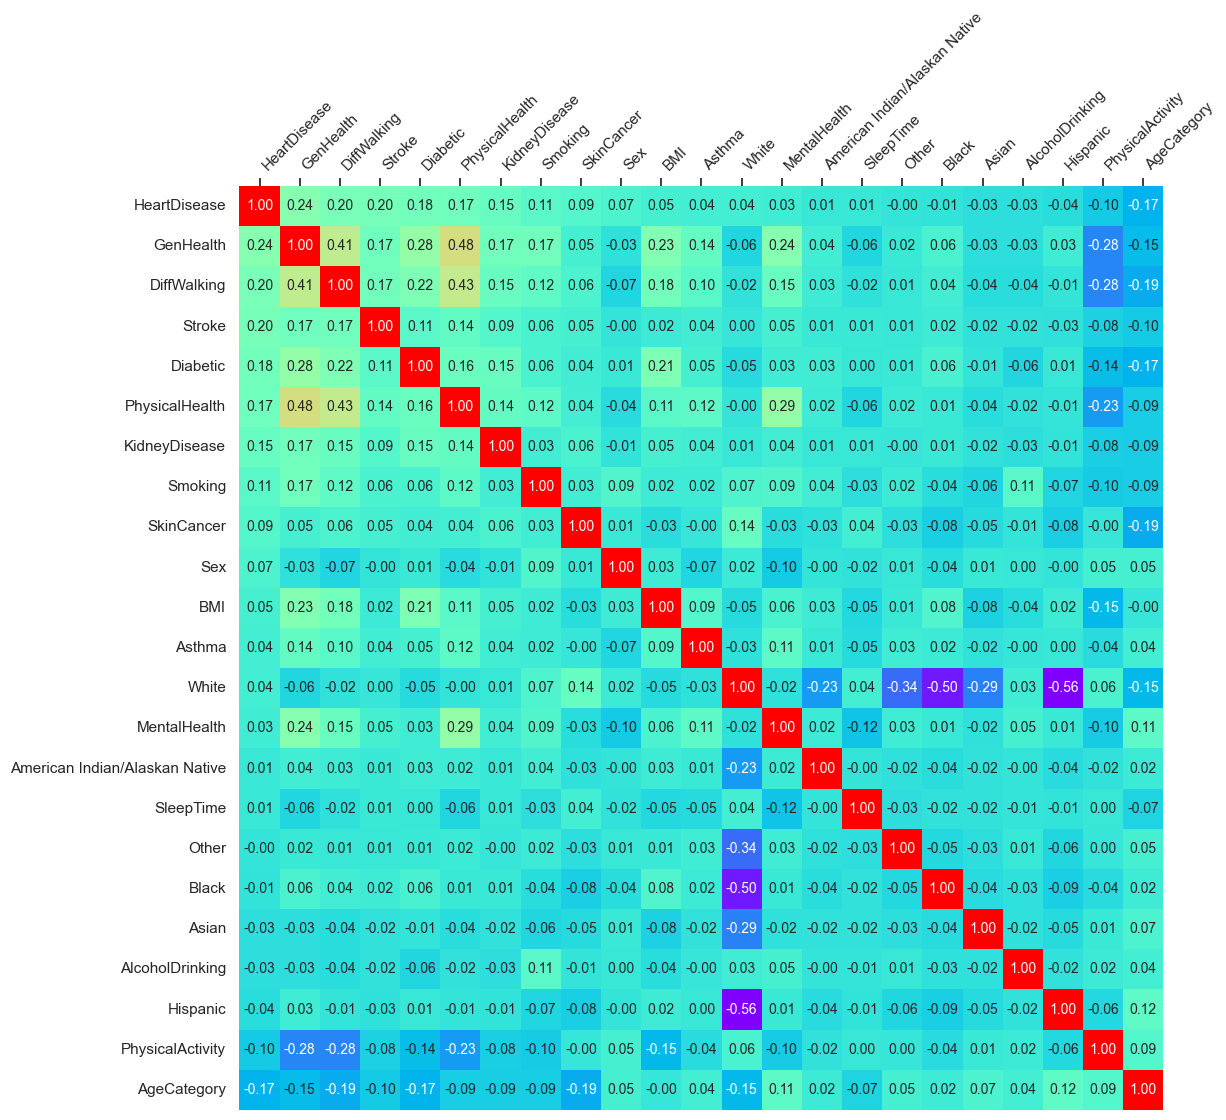

In [111]:
# correlation with HeartDisease
# Convert non-numeric columns to numeric format
# Drop non-numeric columns
numeric_columns = dff.select_dtypes(include=[np.number]).columns
heart_numeric = dff[numeric_columns]

# Calculate correlation matrix
corrmat = heart_numeric.corr()
plt.figure(figsize=(12, 12))
k=23
cols = corrmat.nlargest(k, 'HeartDisease')['HeartDisease'].index
cm = np.corrcoef(dff[cols].values.T)
sns.set(font_scale=1.)
hm = sns.heatmap(cm, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values, 
                 cmap="rainbow", cbar_kws={"shrink": 0.8})
hm.xaxis.tick_top()
plt.xticks(rotation=45, ha='left')
plt.show()

# BINNING

In [112]:
import pandas as pd
# Define the number of bins
num_bins = 3

# Calculate the bin width
min_value = heart_df['BMI'].min()
max_value = heart_df['BMI'].max()
bin_width = (max_value - min_value) / num_bins

# Create bins
bins = [min_value + i * bin_width for i in range(num_bins + 1)]

# Perform equal width binning
def equiwidth(arr1, m):
    result = []
    for i in range(m):
        temp = []
        for j in arr1:
            if bins[i] <= j < bins[i + 1]:
                temp.append(j)
        result.append(temp)
    return result

# Apply equal width binning to the BMI column
binned_BMI = equiwidth(heart_df['BMI'], num_bins)

# Print the binned BMI values
print("Equal width binning for BMI:")
for i, bin_values in enumerate(binned_BMI):
    print(f"Bin {i + 1}: {bin_values}")

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [113]:
import pandas as pd
# Choose the variable you want to discretize (e.g., "BMI")
variable = "BMI"
data_to_bin = heart_df[variable]
# Define the number of bins
num_bins = 3
# Calculate the bin size (number of data points per bin)
bin_size = len(data_to_bin) // num_bins
# Sort the data
sorted_data = data_to_bin.sort_values()
# Create equal frequency bins
equal_freq_bins = [sorted_data[i * bin_size: (i + 1) * bin_size] for i in range(num_bins)]
# Print the equal frequency bins
print("Equal frequency binning for", variable)
for i, bin_values in enumerate(equal_freq_bins):
    print(f"Bin {i + 1}:", bin_values.tolist())


Equal frequency binning for BMI
Bin 1: 

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.21513944223107578, 0.2151394422

In [114]:
num_bins = 10
bin_width = (heart_df['BMI'].max() - heart_df['BMI'].min()) / num_bins

heart_df['equal_width_bins'] = pd.cut(heart_df['BMI'], bins=num_bins, labels=[f'Bin {i+1}' for i in range(num_bins)])

print(heart_df[['BMI', 'equal_width_bins']])

             BMI equal_width_bins
0       0.055294            Bin 1
1       0.100447            Bin 2
2       0.175782            Bin 2
3       0.147169            Bin 2
4       0.141132            Bin 2
...          ...              ...
319790  0.185802            Bin 2
319791  0.215139            Bin 3
319792  0.147531            Bin 2
319793  0.250996            Bin 3
319794  0.416999            Bin 5

[319795 rows x 2 columns]


In [115]:
heart_df['equal_width_bins'].unique()

['Bin 1', 'Bin 2', 'Bin 3', 'Bin 4', 'Bin 5', 'Bin 6', 'Bin 8', 'Bin 7', 'Bin 9', 'Bin 10']
Categories (10, object): ['Bin 1' < 'Bin 2' < 'Bin 3' < 'Bin 4' ... 'Bin 7' < 'Bin 8' < 'Bin 9' < 'Bin 10']

In [116]:
import pandas as pd

num_bins = 10
bin_width = (heart_df['BMI'].max() - heart_df['BMI'].min()) / num_bins

heart_df['equal_frequency_bins'] = pd.qcut(heart_df['BMI'], q=num_bins, labels=[f'Bin {i+1}' for i in range(num_bins)])

print(heart_df[['BMI', 'equal_frequency_bins']])

             BMI equal_frequency_bins
0       0.055294                Bin 1
1       0.100447                Bin 1
2       0.175782                Bin 5
3       0.147169                Bin 3
4       0.141132                Bin 3
...          ...                  ...
319790  0.185802                Bin 6
319791  0.215139                Bin 7
319792  0.147531                Bin 3
319793  0.250996                Bin 9
319794  0.416999               Bin 10

[319795 rows x 2 columns]


In [117]:
import pandas as pd

# Assuming heart_df is your DataFrame containing the 'BMI' data

num_bins = 10  # Number of bins you want
heart_df['equal_frequency_bins'] = pd.qcut(heart_df['BMI'], q=num_bins, labels=[f'Bin {i+1}' for i in range(num_bins)])

print(heart_df[['BMI', 'equal_frequency_bins']])


             BMI equal_frequency_bins
0       0.055294                Bin 1
1       0.100447                Bin 1
2       0.175782                Bin 5
3       0.147169                Bin 3
4       0.141132                Bin 3
...          ...                  ...
319790  0.185802                Bin 6
319791  0.215139                Bin 7
319792  0.147531                Bin 3
319793  0.250996                Bin 9
319794  0.416999               Bin 10

[319795 rows x 2 columns]


In [118]:
import numpy as np
import pandas as pd

# Define the number of desired bins
num_bins = 5  # You can adjust this as needed

# Calculate equal-frequency bins for the 'BMI' column
def equal_frequency_binning(x, nbin):
    labels = [f'Bin {i+1}' for i in range(nbin)]
    return pd.qcut(x, q=nbin, labels=labels, duplicates='drop')

# Apply equal-frequency binning to the 'BMI' column
heart_df['BMI_Binned'] = equal_frequency_binning(heart_df['BMI'], num_bins)

# Display the resulting DataFrame with the new 'BMI_Binned' column
print(heart_df[['BMI', 'BMI_Binned']])


             BMI BMI_Binned
0       0.055294      Bin 1
1       0.100447      Bin 1
2       0.175782      Bin 3
3       0.147169      Bin 2
4       0.141132      Bin 2
...          ...        ...
319790  0.185802      Bin 3
319791  0.215139      Bin 4
319792  0.147531      Bin 2
319793  0.250996      Bin 5
319794  0.416999      Bin 5

[319795 rows x 2 columns]


In [119]:
import numpy as np
import pandas as pd

# Define the number of desired bins
num_bins = 3  # You can adjust this as needed

# Calculate the width of each interval
min_bmi = heart_df['BMI'].min()
max_bmi = heart_df['BMI'].max()
width = (max_bmi - min_bmi) / num_bins

# Create bin boundaries
bin_boundaries = [min_bmi + i * width for i in range(num_bins + 1)]

# Assign each BMI value to the appropriate bin
heart_df['BMI_Binned'] = pd.cut(heart_df['BMI'], bins=bin_boundaries, labels=False)

# Display the resulting DataFrame with the new 'BMI_Binned' column
print(heart_df[['BMI', 'BMI_Binned']])


             BMI  BMI_Binned
0       0.055294         0.0
1       0.100447         0.0
2       0.175782         0.0
3       0.147169         0.0
4       0.141132         0.0
...          ...         ...
319790  0.185802         0.0
319791  0.215139         0.0
319792  0.147531         0.0
319793  0.250996         0.0
319794  0.416999         1.0

[319795 rows x 2 columns]


In [120]:
import numpy as np
import pandas as pd

# Define the number of desired bins
num_bins = 3  # You can adjust this as needed

# Calculate the width of each interval
min_bmi = heart_df['BMI'].min()
max_bmi = heart_df['BMI'].max()
width = (max_bmi - min_bmi) / num_bins

# Create bin boundaries
bin_boundaries = [min_bmi + i * width for i in range(num_bins + 1)]

# Assign each BMI value to the appropriate bin
heart_df['BMI_Binned_EqualWidth'] = pd.cut(heart_df['BMI'], bins=bin_boundaries, labels=False)

# Display the resulting DataFrame with the new 'BMI_Binned_EqualWidth' column
print(heart_df[['BMI', 'BMI_Binned_EqualWidth']])


             BMI  BMI_Binned_EqualWidth
0       0.055294                    0.0
1       0.100447                    0.0
2       0.175782                    0.0
3       0.147169                    0.0
4       0.141132                    0.0
...          ...                    ...
319790  0.185802                    0.0
319791  0.215139                    0.0
319792  0.147531                    0.0
319793  0.250996                    0.0
319794  0.416999                    1.0

[319795 rows x 2 columns]


In [121]:
import numpy as np
import pandas as pd
# Define the number of desired bins for equal-frequency binning
num_bins_equal_freq = 3  # You can adjust this as needed

# Define equal-frequency binning function
def equal_frequency_binning(x, nbin):
    bins = np.linspace(0, 1, nbin + 1) * len(x)
    return pd.cut(x.rank(method='first'), bins, labels=[f'Bin {i+1}' for i in range(nbin)])

# Apply equal-frequency binning to the 'BMI' column
heart_df['BMI_Binned_EqualFreq'] = equal_frequency_binning(heart_df['BMI'], num_bins_equal_freq)

# Display the resulting DataFrame with the new 'BMI_Binned_EqualFreq' column
print(heart_df[['BMI', 'BMI_Binned_EqualFreq']])


             BMI BMI_Binned_EqualFreq
0       0.055294                Bin 1
1       0.100447                Bin 1
2       0.175782                Bin 2
3       0.147169                Bin 1
4       0.141132                Bin 1
...          ...                  ...
319790  0.185802                Bin 2
319791  0.215139                Bin 3
319792  0.147531                Bin 1
319793  0.250996                Bin 3
319794  0.416999                Bin 3

[319795 rows x 2 columns]


In [122]:
import pandas as pd
# Choose the variable you want to sample (e.g., "BMI")
variable_to_sample = "BMI"

# Set the desired sample size (e.g., 1000)
sample_size = 100000

# Perform simple random sampling
random_sample = heart_df.sample(n=sample_size, random_state=42)  # Use a fixed random seed for reproducibility

# Print the random sample
print("Random sample of", sample_size, "observations from", variable_to_sample, ":")
print(random_sample[variable_to_sample])

Random sample of 100000 observations from BMI :
271884    0.188458
270361    0.119884
219060    0.233007
24010     0.342026
181930    0.284800
            ...   
156540    0.244597
309540    0.104431
142853    0.276832
211568    0.184957
121188    0.158880
Name: BMI, Length: 100000, dtype: float64


In [123]:
import pandas as pd
# Suppose we want to perform cluster sampling on the 'BMI' variable
# Create clusters (e.g., based on different age groups)
clusters = heart_df.groupby('AgeCategory')

# Randomly select some clusters (e.g., two age groups)
selected_clusters = clusters.sample(n=2, random_state=42)

# Include all members from the selected clusters in the sample
cluster_sample = selected_clusters

# Print the cluster sample
print("Cluster sample based on age groups:")
print(cluster_sample[['AgeCategory', 'BMI']])


Cluster sample based on age groups:
        AgeCategory       BMI
64751         18-24  0.216467
193542        18-24  0.137390
152490        25-29  0.181577
290413        25-29  0.104431
304671        30-34  0.082217
37515         30-34  0.247857
41812         35-39  0.119884
208291        35-39  0.166365
146879        40-44  0.173488
2480          40-44  0.192080
205504        45-49  0.175299
130410        45-49  0.262345
49281         50-54  0.195943
213454        50-54  0.226850
18020         55-59  0.182301
257134        55-59  0.175299
11661         60-64  0.196426
128566        60-64  0.185802
38710         65-69  0.116021
147901        65-69  0.126041
93937         70-74  0.193650
279849        70-74  0.219848
130318        75-79  0.284921
190013        75-79  0.200048
311452  80 or older  0.227937
208079  80 or older  0.142219


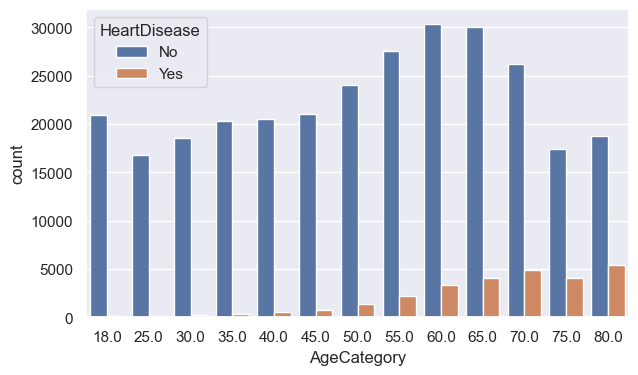

In [124]:
plt.figure(figsize=(7, 4))
sns.countplot(data=data, x='AgeCategory',hue='HeartDisease')
plt.show()

In [132]:
heart_all.head()

HeartDisease  Smoking  AlcoholDrinking  Stroke  DiffWalking  Sex  \
0             0        1                0       0            0    0   
1             0        0                0       1            0    0   
2             0        1                0       0            0    1   
3             0        0                0       0            0    0   
4             0        0                0       0            1    0   

   AgeCategory  Diabetic  PhysicalActivity  GenHealth  ...  \
0            0         3                 1          1  ...   
1            1         0                 1          1  ...   
2            2         3                 1          3  ...   
3            3         0                 0          2  ...   
4            4         0                 1          1  ...   

   American Indian/Alaskan Native  Asian  Black  Hispanic  Other  White  \
0                               0      0      0         0      0      1   
1                               0      0      0         0      0      1   
2                               0      0      0         0      0      1   
3                               0      0      0         0      0      1   
4                               0      0      0         0      0      1   

           BMI  PhysicalHealth  MentalHealth SleepTime  
0  Underweight             3.0          30.0       5.0  
1       Normal             0.0           0.0       7.0  
2   Overweight            20.0          30.0       8.0  
3       Normal             0.0           0.0       6.0  
4       Normal            28.0           0.0       8.0  

[5 rows x 23 columns]

In [130]:
bmi_bins=[10,18,25,35,40,100]
bmi_labels=['Underweight','Normal','Overweight','Obesityfi','Extreme']
heart_all['BMI']=pd.cut(heart_all['BMI'],bins=bmi_bins,labels=bmi_labels)

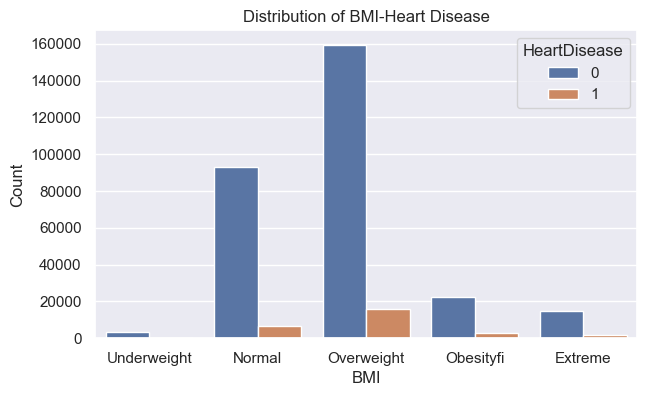

In [131]:
plt.figure(figsize=(7, 4))
sns.countplot(data=heart_all,x='BMI',hue='HeartDisease')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of BMI-Heart Disease')
plt.legend(title='HeartDisease')
plt.show()

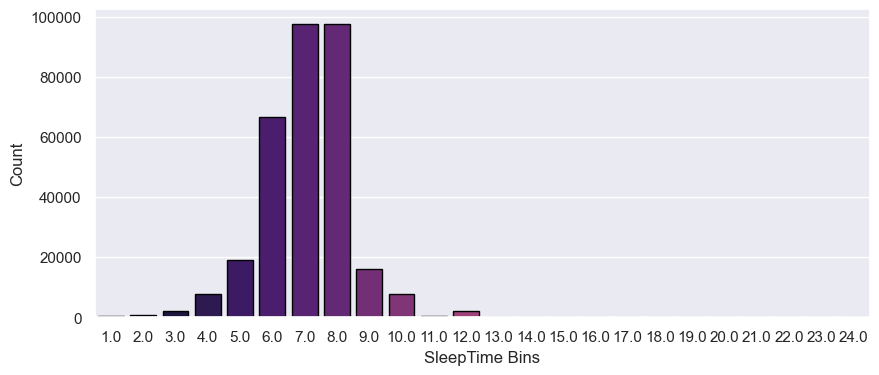

In [139]:
df['SleepTime'] = df['SleepTime'].drop_duplicates()
df['SleepTime'] = pd.qcut(df['SleepTime'], q=num_bins, labels=False, precision=3)
df['SleepTime'] = pd.qcut(df['SleepTime'], q=num_bins, labels=False, precision=3, duplicates='drop')
plt.figure(figsize=(10, 4))
sns.countplot(data=heart_all,x='SleepTime',palette='magma',edgecolor='black')
plt.xlabel('SleepTime Bins')
plt.ylabel('Count')
plt.show()

In [146]:
import pandas as pd

# Define the bin edges and labels
bin_edges = [0, 5, 10, 15, 20, 25, 30]
bin_labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30']

# Perform binning on the 'PhysicalHealth' column
heart_all['PhysicalHealth_Bin'] = pd.cut(heart_all['PhysicalHealth'], bins=bin_edges, labels=bin_labels)

# Create a pivot table to count occurrences of each bin for each stage
pivot_df = heart_all.pivot_table(index='PhysicalHealth_Bin', columns='HeartDisease', aggfunc='size', fill_value=0)

# Display the pivot table
pivot_df


HeartDisease            0     1
PhysicalHealth_Bin             
0-5                 42053  4007
6-10                10823  1633
11-15                7321  1365
16-20                2938   725
21-25                1597   395
26-30               15523  4826

<Figure size 700x400 with 0 Axes>

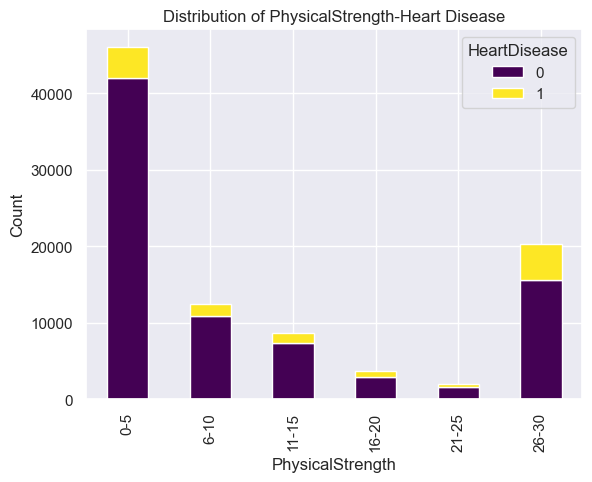

In [147]:
plt.figure(figsize=(7, 4))
pivot_df.plot(kind='bar',stacked=True,colormap='viridis')
plt.xlabel('PhysicalStrength')
plt.ylabel('Count')
plt.title('Distribution of PhysicalStrength-Heart Disease')
plt.show()

In [20]:
heart_all.head()

HeartDisease  Smoking  AlcoholDrinking  Stroke  DiffWalking  Sex  \
0             0        1                0       0            0    0   
1             0        0                0       1            0    0   
2             0        1                0       0            0    1   
3             0        0                0       0            0    0   
4             0        0                0       0            1    0   

   AgeCategory  Diabetic  PhysicalActivity  GenHealth  ...  \
0            0         3                 1          1  ...   
1            1         0                 1          1  ...   
2            2         3                 1          3  ...   
3            3         0                 0          2  ...   
4            4         0                 1          1  ...   

   American Indian/Alaskan Native  Asian  Black  Hispanic  Other  White  \
0                               0      0      0         0      0      1   
1                               0      0      0         0      0      1   
2                               0      0      0         0      0      1   
3                               0      0      0         0      0      1   
4                               0      0      0         0      0      1   

     BMI  PhysicalHealth  MentalHealth  SleepTime  
0  16.60             3.0          30.0        5.0  
1  20.34             0.0           0.0        7.0  
2  26.58            20.0          30.0        8.0  
3  24.21             0.0           0.0        6.0  
4  23.71            28.0           0.0        8.0  

[5 rows x 23 columns]

# NORMALISATION 

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Assuming your data is loaded in a pandas dataframe 'heart_all'

# Separate features (X) from the dataframe
X = heart_all.drop('HeartDisease', axis=1)  # Replace 'HeartDisease' with your target variable name

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on the features (X) to learn the data range
scaler.fit(X)

# Normalize the features (X) using the fitted scaler
X_normalized = scaler.transform(X)

# Now you have your normalized features in X_normalized
# You can create a new dataframe with normalized features and target variable
heart_all_normalized = pd.concat([pd.DataFrame(X_normalized, columns=X.columns), heart_all['HeartDisease']], axis=1)

# Print a sample of the normalized data to verify
print(heart_all_normalized.head())


   Smoking  AlcoholDrinking  Stroke  DiffWalking  Sex  AgeCategory  Diabetic  \
0      1.0              0.0     0.0          0.0  0.0     0.000000       1.0   
1      0.0              0.0     1.0          0.0  0.0     0.083333       0.0   
2      1.0              0.0     0.0          0.0  1.0     0.166667       1.0   
3      0.0              0.0     0.0          0.0  0.0     0.250000       0.0   
4      0.0              0.0     0.0          1.0  0.0     0.333333       0.0   

   PhysicalActivity  GenHealth  Asthma  ...  Asian  Black  Hispanic  Other  \
0               1.0       0.25     1.0  ...    0.0    0.0       0.0    0.0   
1               1.0       0.25     0.0  ...    0.0    0.0       0.0    0.0   
2               1.0       0.75     1.0  ...    0.0    0.0       0.0    0.0   
3               0.0       0.50     0.0  ...    0.0    0.0       0.0    0.0   
4               1.0       0.25     0.0  ...    0.0    0.0       0.0    0.0   

   White       BMI  PhysicalHealth  MentalHealth  

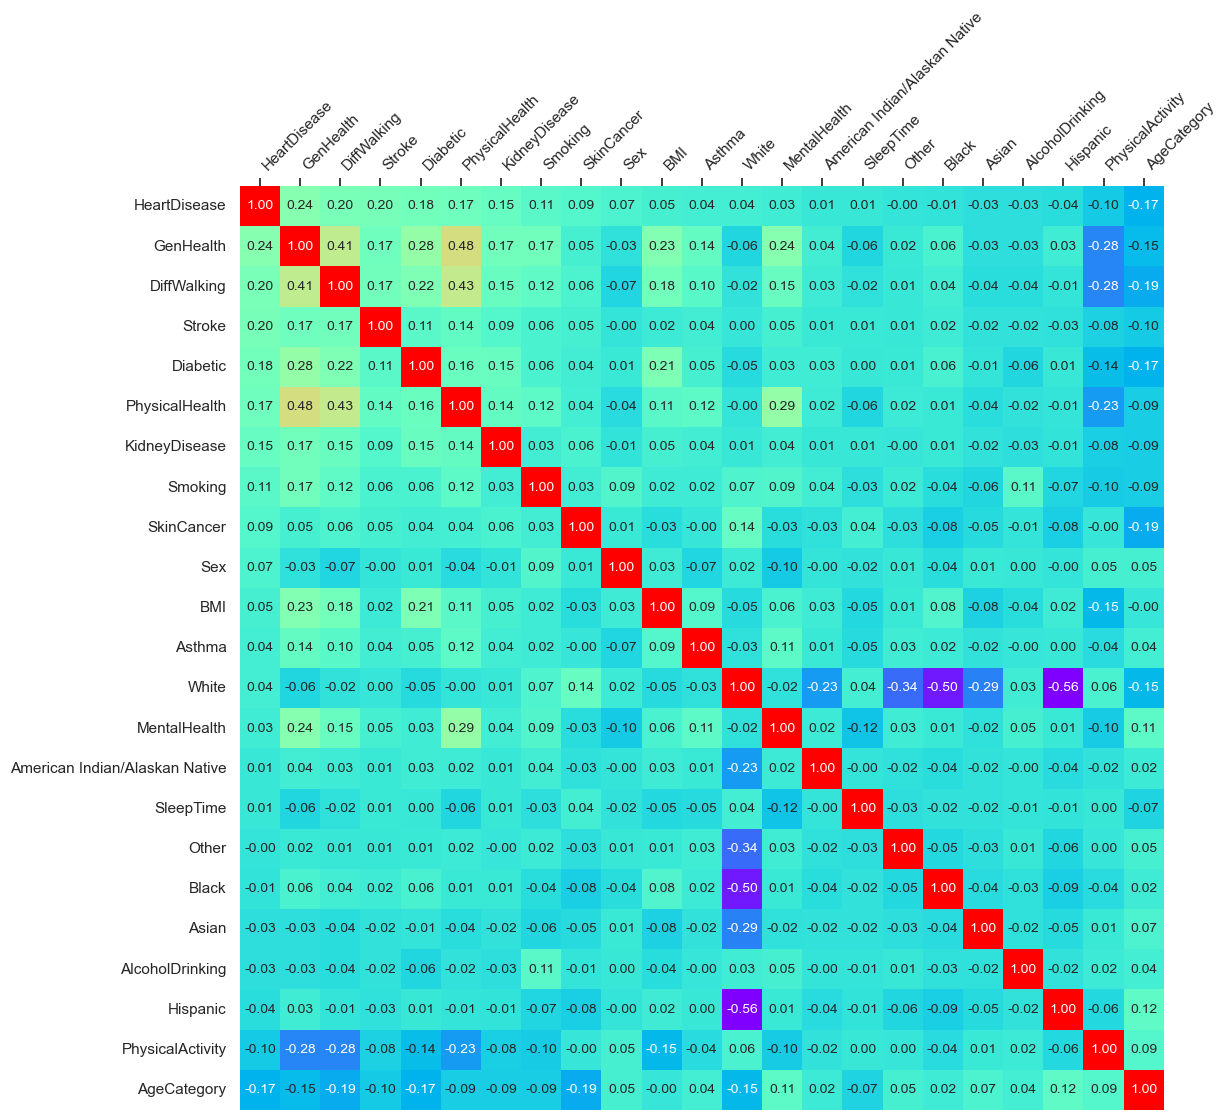

In [33]:

# Calculate correlation matrix
corrmat = heart_all_normalized.corr()
plt.figure(figsize=(12, 12))
k=23
cols = corrmat.nlargest(k, 'HeartDisease')['HeartDisease'].index
cm = np.corrcoef(heart_all_normalized[cols].values.T)
sns.set(font_scale=1.)
hm = sns.heatmap(cm, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values, 
                 cmap="rainbow", cbar_kws={"shrink": 0.8})
hm.xaxis.tick_top()
plt.xticks(rotation=45, ha='left')
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Replace with your chosen model
from sklearn.metrics import accuracy_score

# Assuming you have loaded your normalized data into a dataframe 'heart_all_normalized'
# Assuming the target variable is named 'HeartDisease'

# Separate features (X) and target variable (y)
X = heart_all_normalized.drop('HeartDisease', axis=1)
y = heart_all_normalized['HeartDisease']

# Set the test size (portion of data for testing)
test_size = 0.2  # You can adjust this value (e.g., 0.1 for 10% test data)

# Create random train and test splits using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Define and train a model (replace RandomForestClassifier with your choice)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy on Normalized Data:", accuracy)


Accuracy on Normalized Data: 0.9044700511265029


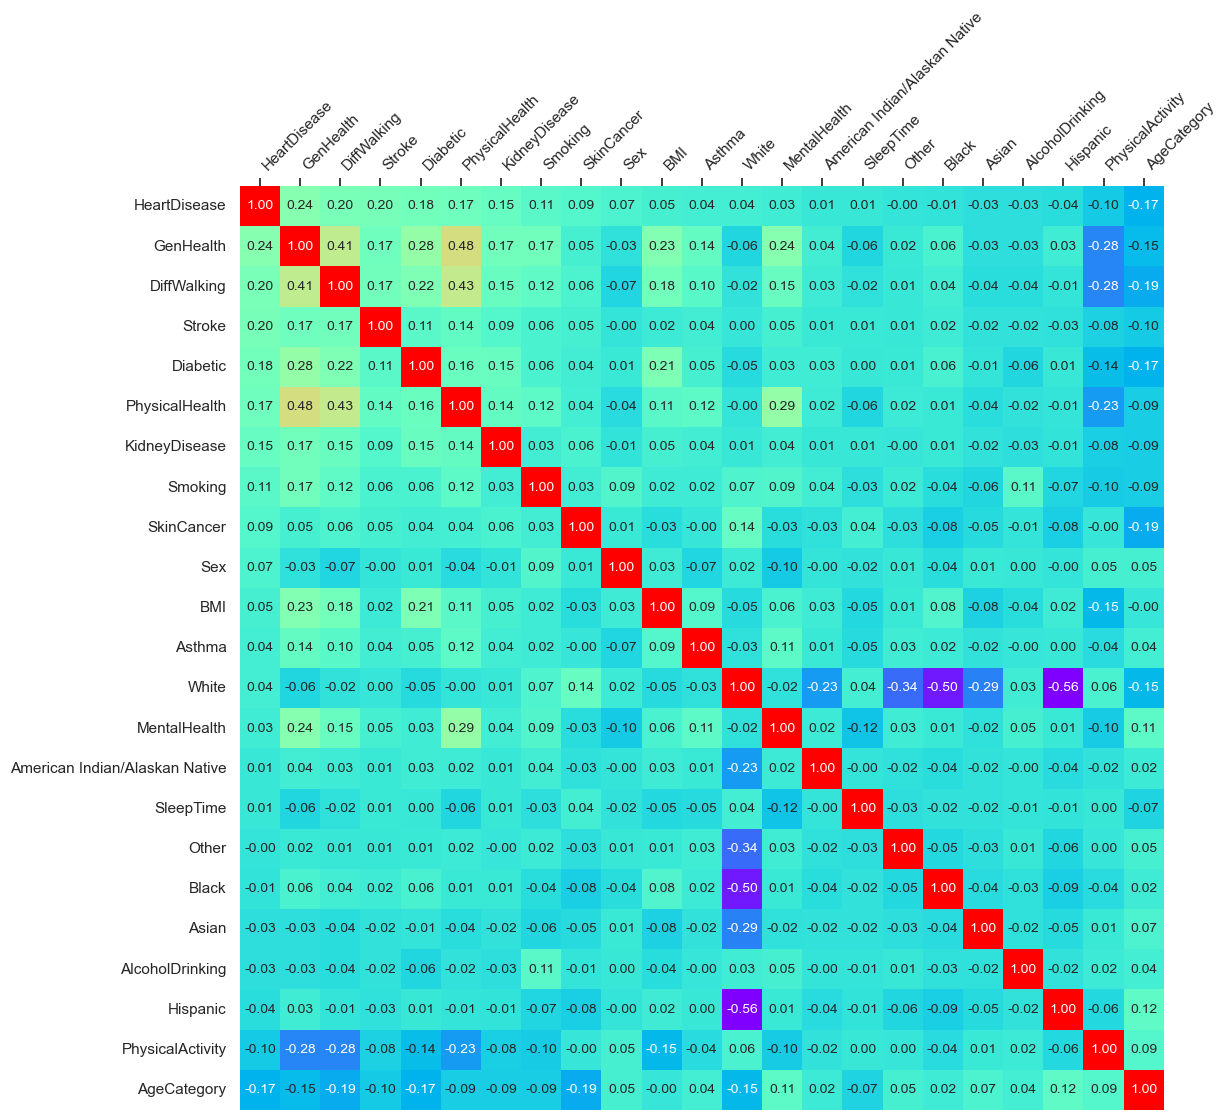

In [34]:

# Calculate correlation matrix
corrmat = heart_all.corr()
plt.figure(figsize=(12, 12))
k=23
cols = corrmat.nlargest(k, 'HeartDisease')['HeartDisease'].index
cm = np.corrcoef(heart_all[cols].values.T)
sns.set(font_scale=1.)
hm = sns.heatmap(cm, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values, 
                 cmap="rainbow", cbar_kws={"shrink": 0.8})
hm.xaxis.tick_top()
plt.xticks(rotation=45, ha='left')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Replace with your chosen model
from sklearn.metrics import accuracy_score

# Assuming you have loaded your original data into a dataframe 'heart_all'
# Assuming the target variable is named 'HeartDisease'

# Separate features (X) and target variable (y)
X = heart_all.drop('HeartDisease', axis=1)
y = heart_all['HeartDisease']

# Set the test size (portion of data for testing)
test_size = 0.2  # You can adjust this value (e.g., 0.1 for 10% test data)

# Create random train and test splits using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Define and train a model (replace RandomForestClassifier with your choice)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy on Original Data:", accuracy)


Accuracy on Original Data: 0.9047514814177833


# SAMPLING

In [21]:
import pandas as pd
# Choose the variable you want to sample (e.g., "BMI")
variable_to_sample = "BMI"

# Set the desired sample size (e.g., 1000)
sample_size = 100000

# Perform simple random sampling
random_sample = heart_df.sample(n=sample_size, random_state=42)  # Use a fixed random seed for reproducibility

# Print the random sample
print("Random sample of", sample_size, "observations from", variable_to_sample, ":")
print(random_sample[variable_to_sample])

Random sample of 100000 observations from BMI :
271884    27.63
270361    21.95
219060    31.32
24010     40.35
181930    35.61
          ...  
156540    32.28
309540    20.67
142853    34.95
211568    27.34
121188    25.18
Name: BMI, Length: 100000, dtype: float64


In [22]:
import pandas as pd
# Choose the variable you want to sample (e.g., "BMI")
variable_to_sample = "BMI"

# Set the desired sample size (e.g., 1000)
sample_size = 100000

# Perform simple random sampling
random_sample = heart_df.sample(n=sample_size, random_state=42)  # Use a fixed random seed for reproducibility

# Print the random sample
print("Random sample of", sample_size, "observations from", variable_to_sample, ":")
print(random_sample[variable_to_sample])

Random sample of 100000 observations from BMI :
271884    27.63
270361    21.95
219060    31.32
24010     40.35
181930    35.61
          ...  
156540    32.28
309540    20.67
142853    34.95
211568    27.34
121188    25.18
Name: BMI, Length: 100000, dtype: float64


In [23]:
# Suppose we want to perform stratified sampling on the 'BMI' variable
# Create strata based on 'AgeCategory'
strata = heart_df.groupby('AgeCategory')

# Randomly select some members from each stratum
stratified_sample = strata.apply(lambda x: x.sample(n=50, random_state=42))

# Print the stratified sample
print("Stratified sample based on age groups:")
print(stratified_sample[['AgeCategory', 'BMI']])

Stratified sample based on age groups:
                    AgeCategory    BMI
AgeCategory                           
18-24       64751         18-24  29.95
            193542        18-24  23.40
            119267        18-24  22.15
            71272         18-24  18.65
            171343        18-24  24.41
...                         ...    ...
80 or older 244360  80 or older  31.25
            46860   80 or older  30.82
            54767   80 or older  32.49
            154954  80 or older  23.03
            277762  80 or older  26.47

[650 rows x 2 columns]


In [38]:
import pandas as pd

# Define the attributes (features) for stratification
attributes_to_stratify = ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth','HeartDisease','DiffWalking','Sex','AgeCategory','Race','Diabetic','GenHealth']

# Create an empty DataFrame to store the stratified sample
stratified_sample = pd.DataFrame()

# Perform stratified sampling for each attribute
for attribute in attributes_to_stratify:
    strata = heart_df.groupby(attribute)
    sample_from_strata = strata.apply(lambda x: x.sample(n=50, replace=True, random_state=42))
    stratified_sample = pd.concat([stratified_sample, sample_from_strata])

# Print the stratified sample
print("Stratified sample based on all attributes:")
print(stratified_sample)


Stratified sample based on all attributes:
                 HeartDisease    BMI Smoking AlcoholDrinking Stroke  \
BMI                                                                   
12.02     69662            No  12.02     Yes              No     No   
          205511           No  12.02      No              No     No   
          69662            No  12.02     Yes              No     No   
          69662            No  12.02     Yes              No     No   
          69662            No  12.02     Yes              No     No   
...                       ...    ...     ...             ...    ...   
Very good 192014           No  32.34     Yes              No     No   
          11553            No  21.79      No              No     No   
          118032          Yes  37.25     Yes              No     No   
          269379          Yes  32.28     Yes              No     No   
          223010           No  28.19      No              No     No   

                  PhysicalHealth 

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd

# Assuming you have loaded your data into a pandas dataframe named 'df'

# Define the target variable (e.g., column indicating presence of heart disease)
target_variable = 'HeartDisease'  # Replace with your actual target variable name

# Separate features (X) and target variable (y)
X = heart_all.drop(target_variable, axis=1)
y = heart_all[target_variable]

# Define strata based on the target variable
strata = y

# Set the desired test size (portion of data for testing)
test_size = 0.2  # You can adjust this value (e.g., 0.1 for 10% test data)

# Create a stratified split object with random state for reproducibility
sss = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42)

# Generate train and test sets using loops (avoiding nested loops for efficiency)
for train_index, test_index in sss.split(X, strata):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]

# Now you have your stratified training and testing sets:
# X_train, X_test contain features for training and testing respectively
# y_train, y_test contain target variables for training and testing respectively

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 255836
Testing set size: 63959


In [26]:
# Assuming you have already defined 'strata_counts' from the previous approach

# Calculate total data points
total_data_points = len(heart_all)

# Get value counts for the target variable
strata_counts = heart_all['HeartDisease'].value_counts()

# Calculate percentages in the original data
strata_percentages = (strata_counts / total_data_points) * 100

# Define desired test size (portion for testing)
test_size = 0.2  # Adjust as needed

# Calculate desired sample size per stratum based on test size and proportions
sample_size_per_strata = strata_percentages * test_size * total_data_points / 100

# Print results in a table format
print("Strata Breakdown:")
print("{:<20} {:>10} {:>20}".format('Heart Disease', 'Original %', 'Sample Size'))
print("-" * 55)
for strata, count, sample in zip(strata_counts.index, strata_percentages, sample_size_per_strata):
    print("{:<20} {:>10.2f}% {:>20.0f}".format(strata, count, sample))

# Note: You can modify this section to create a visualization (e.g., stacked bar chart)


Strata Breakdown:
Heart Disease        Original %          Sample Size
-------------------------------------------------------
0                         91.44%                58484
1                          8.56%                 5475


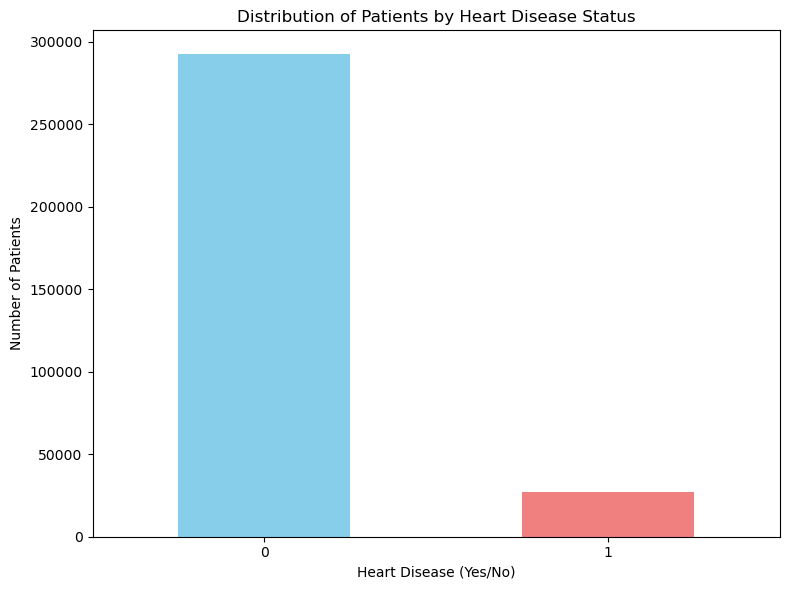

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is loaded in a dataframe 'df'
# Assuming the target variable (strata) is named 'HeartDisease'

# Get value counts for the target variable
strata_counts = heart_all['HeartDisease'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
strata_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])  # Adjust colors as needed
plt.xlabel('Heart Disease (Yes/No)')  # Replace with your target variable labels
plt.ylabel('Number of Patients')
plt.title('Distribution of Patients by Heart Disease Status')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [28]:
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd


def check_sample_accuracy(heart_all, target_variable, test_size=0.2):
  """
  This function checks the accuracy (representativeness) of a stratified sample 
  compared to the original dataset.

  Args:
      df (pandas.DataFrame): The original dataset.
      target_variable (str): The name of the target variable (strata).
      test_size (float, optional): The proportion of data used for sampling (default: 0.2).

  Returns:
      dict: A dictionary containing:
          - original_proportions (dict): Proportions of target variable in original data.
          - sample_proportions (dict): Proportions of target variable in the sample.
          - accuracy (bool): True if sample proportions are close enough to originals 
                             (within a tolerance).
  """

  # Separate features (X) and target variable (y)
  X = heart_all.drop(target_variable, axis=1)
  y = heart_all[target_variable]

  # Define strata based on the target variable
  strata = y

  # Create stratified split object
  sss = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42)

  # Generate the sample
  for train_index, test_index in sss.split(X, strata):
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]

  # Calculate proportions in original data
  original_proportions = y.value_counts(normalize=True).to_dict()

  # Calculate proportions in the sample
  sample_proportions = y_test.value_counts(normalize=True).to_dict()

  # Define a tolerance for considering proportions close enough
  tolerance = 0.05  # Adjust tolerance as needed (e.g., 0.1 for 10% difference)

  # Check if sample proportions are within tolerance of original proportions
  accuracy = all(abs(original_proportions[k] - sample_proportions.get(k, 0)) <= tolerance for k in original_proportions)

  return {
      "original_proportions": original_proportions,
      "sample_proportions": sample_proportions,
      "accuracy": accuracy
  }


# Assuming your data is loaded in a dataframe 'df'
# Assuming the target variable is named 'HeartDisease'

results = check_sample_accuracy(heart_all, target_variable='HeartDisease')

# Print results
print("Original Proportions:", results["original_proportions"])
print("Sample Proportions:", results["sample_proportions"])
print("Sample Accuracy:", results["accuracy"])

if results["accuracy"]:
  print("The sample proportions are within the tolerance level of the original data.")
else:
  print("The sample proportions may not accurately reflect the original data distribution.")


Original Proportions: {0: 0.9144045404086993, 1: 0.08559545959130067}
Sample Proportions: {0: 0.9143982864022264, 1: 0.08560171359777358}
Sample Accuracy: True
The sample proportions are within the tolerance level of the original data.


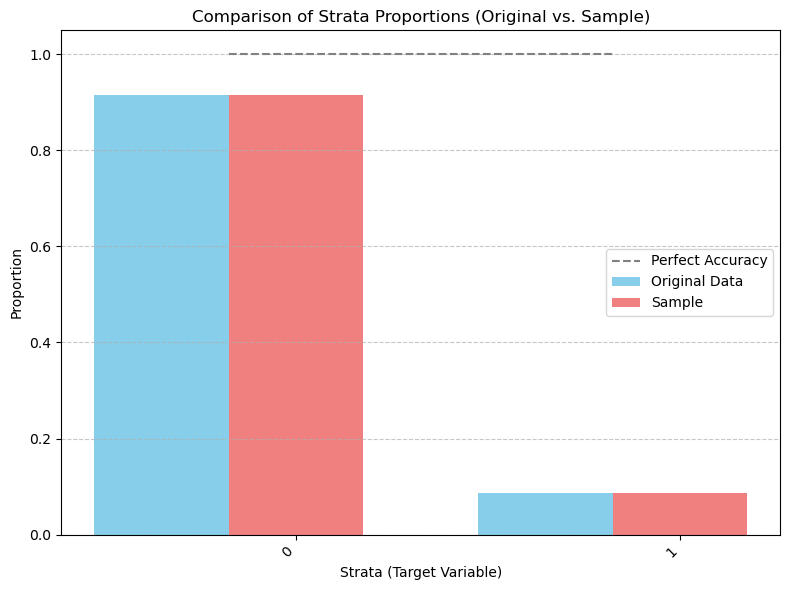

In [29]:
import matplotlib.pyplot as plt

# Assuming you have results from the 'check_sample_accuracy' function

original_proportions = results["original_proportions"]
sample_proportions = results["sample_proportions"]

# Create category labels from original proportions dictionary keys
strata_labels = list(original_proportions.keys())

# Define bar width and colors
bar_width = 0.35
original_color = 'skyblue'
sample_color = 'lightcoral'
reference_color = 'gray'

# Create bar positions for original and sample proportions
x = range(len(strata_labels))
original_pos = [i - bar_width/2 for i in x]
sample_pos = [i + bar_width/2 for i in x]

# Create reference line at y=1 (perfect accuracy)
reference_y = [1] * len(strata_labels)

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(original_pos, original_proportions.values(), bar_width, label='Original Data', color=original_color)
plt.bar(sample_pos, sample_proportions.values(), bar_width, label='Sample', color=sample_color)
plt.plot(x, reference_y, '--', label='Perfect Accuracy', color=reference_color)

# Set labels and title
plt.xlabel('Strata (Target Variable)')
plt.ylabel('Proportion')
plt.title('Comparison of Strata Proportions (Original vs. Sample)')

# Set x-axis tick positions and labels
plt.xticks([i + bar_width / 2 for i in x], strata_labels, rotation=45, ha='right')

# Add legend and grid
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


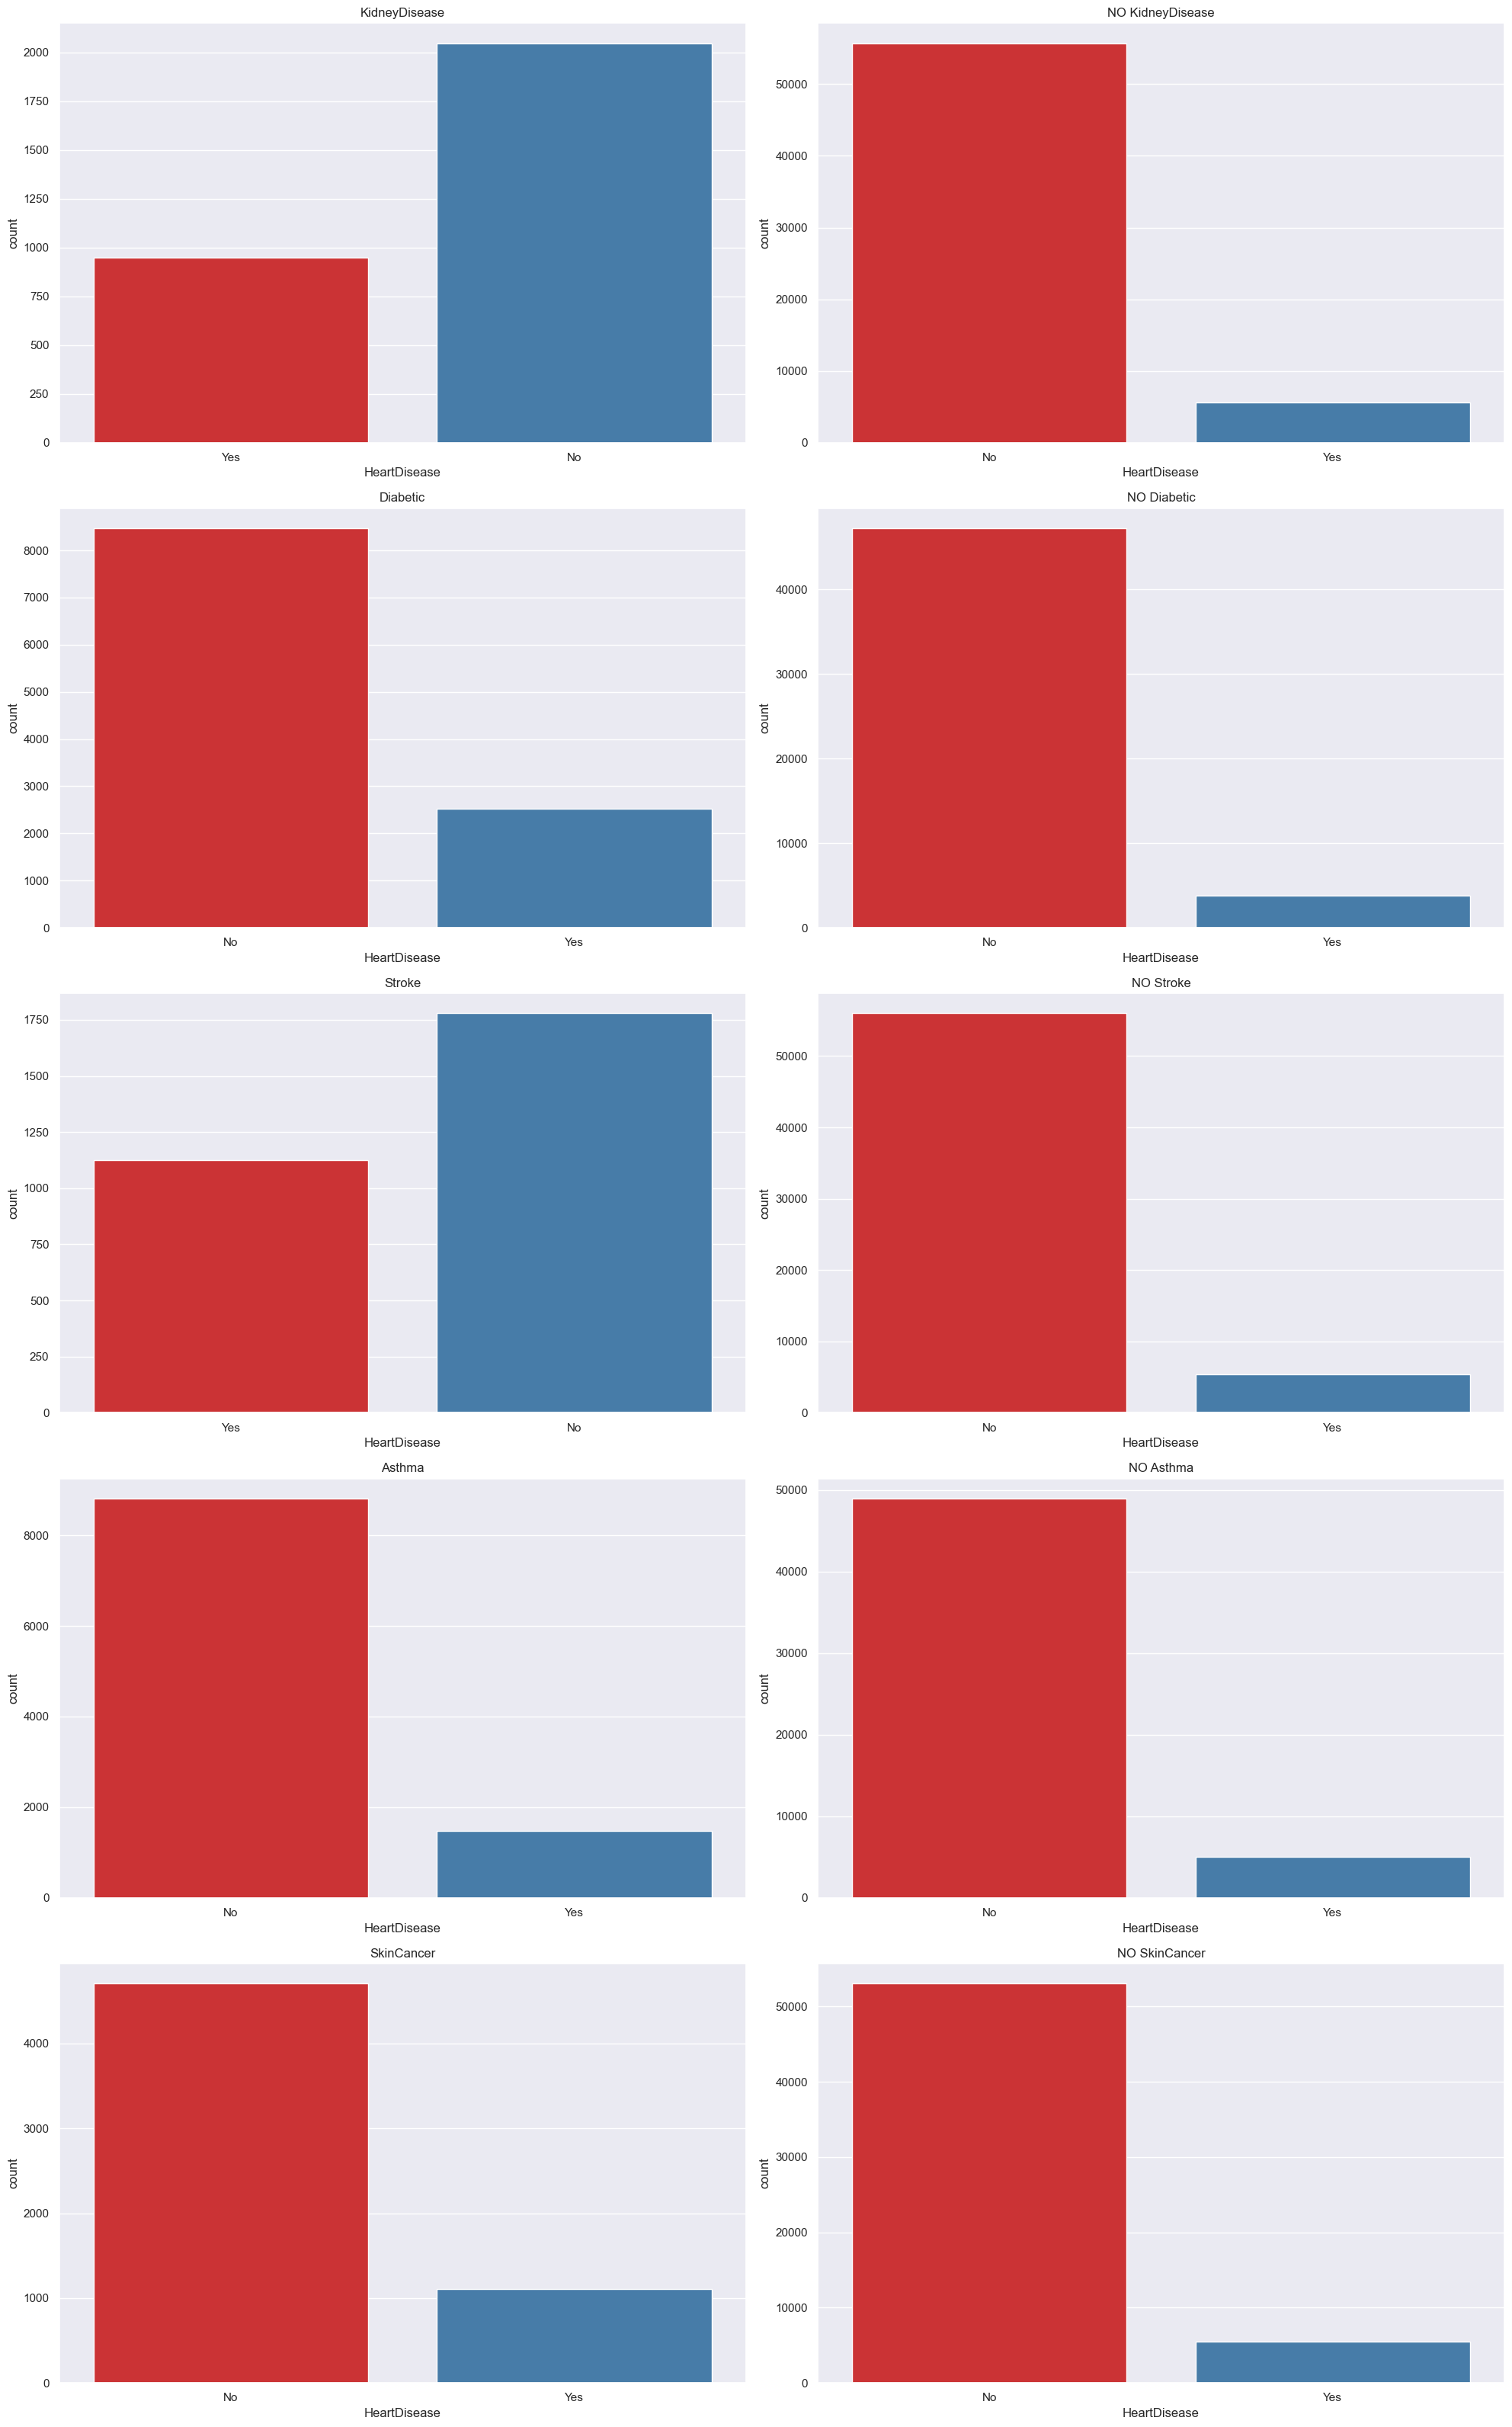

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the data
# Make sure to replace 'HeartDisease' with the actual column name for Heart Disease in your DataFrame

df = stratified_sample.drop_duplicates()
cols = ['KidneyDisease', 'Diabetic', 'Stroke', 'Asthma', 'SkinCancer']

# Create subplots
fig, ax = plt.subplots(5, 2, figsize=(20, 32))
i = 0

for col in cols:
    df_yes = df[df[col] == 'Yes']
    df_no = df[df[col] == 'No']

    # Use countplot for Yes
    sns.countplot(data=df_yes, x='HeartDisease', ax=ax[i][0], palette='Set1').set_title(col)
    
    # Use countplot for No
    sns.countplot(data=df_no, x='HeartDisease', ax=ax[i][1], palette='Set1').set_title("NO " + col)
    
    i += 1

plt.tight_layout()
plt.show()


In [5]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Separate features (X) from the dataframe
X = heart_all.drop('HeartDisease', axis=1) 

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the features (X) to learn the mean and standard deviation
scaler.fit(X)

# Standardize the features (X) using the fitted scaler
X_standardized = scaler.transform(X)

# Combine the standardized features with the target variable
heart_all_standardized = pd.concat([pd.DataFrame(X_standardized, columns=X.columns), 
                                    heart_all['HeartDisease']], axis=1)

# Print a sample of the standardized data to verify
heart_all_standardized.head()

Unnamed: 0   Smoking  AlcoholDrinking    Stroke  DiffWalking       Sex  \
0   -1.732045  1.193474         -0.27032 -0.198040    -0.401578 -0.951711   
1   -1.732035 -0.837890         -0.27032  5.049478    -0.401578 -0.951711   
2   -1.732024  1.193474         -0.27032 -0.198040    -0.401578  1.050739   
3   -1.732013 -0.837890         -0.27032 -0.198040    -0.401578 -0.951711   
4   -1.732002 -0.837890         -0.27032 -0.198040     2.490174 -0.951711   

   AgeCategory  Diabetic  PhysicalActivity  GenHealth  ...     Asian    Black  \
0    -1.522406  2.500836          0.538256  -0.388307  ... -0.160878 -0.27798   
1    -1.245024 -0.422038          0.538256  -0.388307  ... -0.160878 -0.27798   
2    -0.967641  2.500836          0.538256   1.529392  ... -0.160878 -0.27798   
3    -0.690259 -0.422038         -1.857852   0.570542  ... -0.160878 -0.27798   
4    -0.412877 -0.422038          0.538256  -0.388307  ... -0.160878 -0.27798   

   Hispanic     Other     White       BMI  PhysicalHealth  MentalHealth  \
0   -0.3064 -0.188098  0.551505 -1.844750       -0.046751      3.281069   
1   -0.3064 -0.188098  0.551505 -1.256338       -0.424070     -0.490039   
2   -0.3064 -0.188098  0.551505 -0.274603        2.091388      3.281069   
3   -0.3064 -0.188098  0.551505 -0.647473       -0.424070     -0.490039   
4   -0.3064 -0.188098  0.551505 -0.726138        3.097572     -0.490039   

   SleepTime  HeartDisease  
0  -1.460354             0  
1  -0.067601             0  
2   0.628776             0  
3  -0.763977             0  
4   0.628776             0  

[5 rows x 24 columns]

In [3]:
heart_all=pd.read_csv('heart_all.csv')